**Introduction to Nonlinear System Identification for Control**

- The focus is on controlling nonlinear systems using **only measurement data, with no first-principles models**.

- Data-driven regression techniques are used to build both **linear and nonlinear system models**.

- Once a model is identified, **Model Predictive Control (MPC)** can be applied to **design optimal control strategies** — even for nonlinear dynamics.

- SINDy is a machine learning method that discovers **simple, interpretable dynamical systems** (ODEs or PDEs) from time-series data.

- It is a machine learning optimization method that builds **dynamical system models** (ODEs or PDEs) from measured **time-series data**.

- It expresses the time derivative of the state as a **sparse linear combination of candidate (non)linear functions** selected from a **predefined library**.

   - These models can be used for **control, prediction, and understanding**.

**Model Predictive Control (MPC): Core Mechanism**

- MPC works by:

  - Predicting the system’s future behavior over a short time window using a model.

  - Solving an optimization problem at each time step to choose the best control input sequence.

  - Applying **only the first control** input and repeating the process at the next step (receding horizon).

- This cycle allows the controller to adapt in real-time, always optimizing based on the current system state.

- MPC is widely used in industry due to its flexibility and ability to handle constraints and nonlinearities.

**Integrating MPC with SINDy (Sparse Identification of Nonlinear Dynamics)**

- SINDy identifies a sparse, interpretable, and data-driven model of the system dynamics.

- It builds a library of candidate nonlinear functions and uses sparse regression to select only the most relevant terms.

- SINDy with control incorporates external actuation inputs into this model structure.

- This sparse model is then embedded in the MPC framework to enable real-time control of complex, nonlinear systems.

**Structure of the SINDy-MPC Control Loop**

- Collect state and control input data from the unknown system.

- Construct a large set of candidate nonlinear terms (e.g., polynomials, trigonometric functions).

- Use sparse regression to identify a compact, interpretable model that explains the dynamics.

- In the **control loop**:

  - Use this model to predict future system behavior.

  - Optimize a control input sequence.

  - Apply the first control action.

  - Reinitialize the optimizer at each time step using updated state measurements.

**General Workflow of SINDy**:

  - Collect measurement data and approximate time derivatives.
 
  - Build a candidate library of terms (linear, quadratic, trigonometric, etc.).

  - Apply sparse regression to select the minimal set of terms that describe the dynamics.
 
  - Each column in matrix Theta corresponds to active terms in dynamics (X, Y, Z derivatives).

- The **goal** is to solve for a sparse vector of coefficients $\zeta$ that tells which terms are active in each dimension (e.g. $\dot{x}$,$\dot{y}$,$\dot{z}$).

**Why Use SINDy with MPC? Key Advantages**

- **Speed**: SINDy models are compact and execute much faster than complex models like deep neural networks.

- **Interpretability**: The terms in the model have physical meaning, making the dynamics transparent.

- **Efficiency**:

  - Requires significantly less training data.

  - Learns accurate models quickly — in orders of magnitude less time compared to neural networks.

- **Robustness**:

  - Handles noise well in chaotic systems.

  - Maintains qualitative behavior and long prediction horizons even as noise increases.

- **Suitability for Control**:

  - Sparse structure makes SINDy ideal for real-time MPC.
  
  - No black-box behavior — ensures stable and trustworthy predictions.

**The Importance of Data Quality**

- SINDy generally requires:

  - **Clean measurements**,

  - **High temporal sampling**,
  
  - **Dynamically rich data** to correctly infer which terms are active in the system.

- **Challenge**: time derivatives must be estimated from measured data — a notoriously difficult task when data is 

noisy.

  - Noise signals make direct numerical differentiation unstable.

**The Practical Challenge: Noisy, Low-Sample Real-World Data**

- In practice, users often:

  - Lack access to true derivatives,

  - Have limited, noisy time-series (e.g., sensor data),

  - Sample at lower frequencies.
  
-These degrade performance, lead to inaccurate models, or fail to recover correct dynamics.

**Weak Formulation / Integral SINDy**

- A major innovation for handling noisy data:

  - Reformulates the regression problem in an **integrated (weak) form**,

- Instead of fitting **ẋ ≈ Θ(X) ξ**, it fits: **∫ẋ dt ≈ ∫Θ(X) dt**.

- reducing noise influence by **averaging over time**.

- Known as **control volume integration or weak SINDy**.

- Results in better model recovery for **high-noise, real-world systems**.

**Importance of Matrix Conditioning**

- For accurate sparse recovery, **Θ must be well-conditioned**.

- Conditioning improves when:

  - Data contains **diverse trajectories, especially transients**.

  - **Multiple short trajectories** from different initial conditions are **stacked together**.
  

**High-Dimensional Systems and Coordinate Reduction**

- How do we know what the right variables are to measure in the first place?

- How do we know those are the variables that admit a sparse representation in model space?

  - In high-dimensional systems like fluid flow, we might want an ODE-based model even though simulation involves 10k–100k ODEs.

  - SINDy’s library grows rapidly with state dimensionality — we cannot build a 5th-order polynomial library in 100 variables.

  - The combinatorial explosion makes it infeasible.

  - However, low-dimensional coordinate systems often capture the essential dynamics.

**Solution: Dimensionality Reduction via SVD**

- Apply **Singular Value Decomposition (SVD)**, also known as **Principal Component Analysis (PCA)** or **Proper Orthogonal Decomposition (POD)**.

- This yields a **low-dimensional basis** in which you can represent your system efficiently.

- The amplitudes of the top modes (X, Y, Z) often form a great coordinate system for modeling.

- When applied to fluid flow problems, this allows:

  - **A manageable library size**,

  - **Tractable sparse optimization**,

  - **Recovery of the correct dynamical structure**.

**SVD as a Linear Autoencoder – Bridge to Deep Learning**

- The SVD can be thought of as a **shallow linear autoencoder**:

  - High-dimensional input and output,

  - Low-dimensional latent layer,

  - Optimized to minimize reconstruction error.

- If SVD coordinates are not sufficient, extend to a **deep nonlinear autoencoder**:

  - Many layers in encoder and decoder,

  - Nonlinear activations,

  - Learns a nonlinear manifold (coordinate system) tailored to your data.

**Benefits of Coordinate Learning**

- Enables **modeling of very high-dimensional systems** with just a few latent variables.

- Learns representations where **polynomial libraries become effective**.

- In tests, learned models could be **rotated into the original known dynamics** (e.g., rotated Lorenz).

- This shows the autoencoder found **coordinates close to the true physical basis**.

**Key techniques for coordinate discovery**

- **Expert knowledge**,

- **SVD / POD for dimensionality reduction**,

- **Deep autoencoders for nonlinear representation learning**,

- **Sparse modeling in learned or observed coordinates**,

- **Time-delay embedding when state access is limited**.

- These approaches allow SINDy to succeed in:

  - High-dimensional,

  - Under-sampled,

  - Or partially observed systems.

**Performance Metrics**

- **Prediction Horizon**: Time until model deviates beyond acceptable error.

  - SINDy consistently outperforms neural networks as noise increases.

- **Execution Time**:

  - SINDy MPC runs ~1.6 time units vs. ~35 for neural network MPC.

- **Training Efficiency**:

  - SINDy trains 100–10,000x faster than neural networks.

  - Learns good models with far less data.

- **Data Efficiency**:

  - With increasing training data, SINDy rapidly converges to accurate models.

  - Neural networks need significantly more data for comparable performance. 

- Real-Time Control **Results**:

  - SINDy-based MPC accurately and aggressively stabilizes the system.

  - Demonstrates effective control of nonlinear, chaotic dynamics using only data-driven models.

**Broader Applications of SINDy-MPC**

- Successfully applied to diverse domains:

  - **Biological systems** (e.g., predator-prey dynamics, HIV treatment modeling).

  - **Engineering systems** (e.g., fighter jet flight control).

  - **Chaotic systems** (e.g., Lorenz and Lunz systems).

- Shows promise for general **data-driven control** tasks in systems with **complex nonlinearities**.

**Some Practices Notes**

**Data Preparation**:

  - **Sample at high resolution**: Capture system dynamics accurately.

  - **Denoise derivatives**: Use total variation regularization or polynomial smoothing.

  - **Use multiple trajectories**: Improves matrix conditioning and generalization.

  - **Control excitation**: Apply control inputs to distinguish between internal and forced dynamics.

**Library (Theta Matrix) Construction**:

- **Start with linear terms**: Begin simple; add nonlinearities only if needed.

 - **Add polynomials gradually**: Introduce quadratic, cubic, etc., step by step.

 - **Use domain-relevant bases**: E.g., trigonometric for periodic systems, polynomials for fluids.

 - **Avoid overlapping terms**: Prevent multicollinearity and poor conditioning.

 - **Include control/time/parameters**: Extend Theta with known inputs or bifurcation variables.

 - **Design small, testable libraries**: Build modular Theta matrices for better control.

**Dimensionality Reduction**:

  - **PCA / SVD**: Reduce to key modes; avoids curse of dimensionality.


  - **Autoencoders**: Learn low-dimensional latent states for nonlinear systems.

In [1]:
#=======Import Library========
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import gridspec
import numpy as np
from scipy.integrate import solve_ivp
from itertools import product
from copy import deepcopy as cp
from sklearn.linear_model import Lasso   
from sklearn.exceptions import ConvergenceWarning
import warnings  
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Activation, Dropout, TFSMLayer
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger
from tensorflow.keras import regularizers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from keras.regularizers import l2, l1
from sklearn.decomposition import PCA
from tensorflow.keras.optimizers import AdamW, Adam, SGD, Lion
import copy, h5py
from copy import deepcopy as cp
import pandas as pd
import os,sys
sys.path.append('.')
from contour import *  # contour

The monomial_exponents function generates all possible monomial exponent combinations up to a given total degree for

 a specified number of features (num_features). It returns the valid combinations where the sum of the exponents 
 
 does not exceed the total_degree. These combinations are used to create a polynomial library for the SINDy 
 
 algorithm.

In [2]:
# Helper function for monomial exponents (not provided in the original code)
def monomial_exponents(num_features, order):
    """
    Generate all possible monomial exponents up to a given order for the state variables.
    
    Parameters:
        num_features : int
            The number of features (state variables).
        order : int
            The maximum polynomial degree.
    
    Returns:
        exponents : list of tuples
            Each tuple represents a monomial (exponent combination) for the state variables.
    """

    # Generate all combinations of exponents for the monomials
    exponents = ([exp for exp in product(range(order+1), repeat=num_features)])
    return exponents

Example:
For num_features = 2 which corrosponds to 2 coordinates variables and total_degree = 3, the output will be:

In [3]:
powers=monomial_exponents(2,5)
print(powers)

[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (3, 0), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (5, 0), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5)]


The Theta function constructs a candidate library matrix Θ by combining polynomial, trigonometric, and 

time-dependent terms from the input data (x_train and t_train). It generates monomial terms for the state variables, 

polynomials of time, as well as sine and cosine terms for both state variables and time, depending on the specified 

options (${usePolX, usePolT, useTriX, useTriT}$).

In [4]:
# Function to generate the candidate library matrix Θ for SINDy (Sparse Identification of Nonlinear Dynamical Systems)
def Theta(x_train, t_train, order=5, usePolX=True, usePolT=False, useTriX=False, useTriT=False, outputLog=False):
    """
    Generate the candidate library matrix (Θ) for Sparse Identification of Nonlinear Dynamical Systems (SINDy).
    
    Parameters:
        x_train : ndarray, shape (n_samples, n_features)
            The state variables (e.g., x, y, z values over time).
        t_train : ndarray, shape (n_samples,)
            The time points corresponding to the states.
        order : int
            The maximum polynomial degree for terms in x and t.
        usePolX : bool
            Whether to include polynomial terms in x (state variables).
        usePolT : bool
            Whether to include polynomial terms in t (time).
        useTriX : bool
            Whether to include sine and cosine terms for monomials in x.
        useTriT : bool
            Whether to include sine and cosine terms for polynomials in t.
        outputLog : bool
            Whether to output log.   

    Returns:
        mat_theta : ndarray, shape (n_samples, Theta_columns)
            The candidate library matrix Θ constructed from the state variables and time.
    """
   # Dimensions of the input data
    num_samples, num_features = x_train.shape  # Number of samples and features
    powers = monomial_exponents(num_features, order)  # Monomial exponents for features   
    # Initialize the total number of columns in Θ based on the flags provided
    Theta_columns = 0     
    # Determine the number of columns based on which terms to include
    if(usePolX): Theta_columns += len(powers)  # Polynomial terms in x
    if(usePolT): Theta_columns += order        # Time polynomial terms
    if(useTriX): Theta_columns += 2 * num_features * len(powers)  # Sin and Cos of x monomials
    if(useTriT): Theta_columns += 2 * order    # Sin and Cos of time
    # Initialize the Θ matrix (n_samples x Theta_columns)
    mat_theta = np.zeros((num_samples, Theta_columns))
    # Index for tracking columns in mat_theta
    col = 0
    if (outputLog==True): print(f"\nBuilding Θ matrix with {num_samples} samples and {Theta_columns} columns.")
    if (usePolX):
        # 1. Polynomial terms in x
        if (outputLog==True): print("Including polynomial terms in x...")
        for power in powers:
            # Create the polynomial term as a string for logging
            poly_term = create_polynomial_string(power)
            # Multiply the corresponding columns in x_train raised to the power
            mat_theta[:, col] = np.prod(np.power(x_train, power), axis=1)
            col += 1
            if (outputLog==True): print(f"  Polynomial term ({poly_term}): Column {col-1}") 
    
    if (usePolT):
        # 2. Polynomial terms in t
        if (outputLog==True): print("Including polynomial terms in t...")
        for deg in range(1, order + 1):
            # Create the polynomial term for time as a string
            poly_term = f"t^{deg}"
            # Add polynomial terms for time t (t^1, t^2, ..., t^order)
            mat_theta[:, col] = np.power(t_train, deg)
            col += 1
            if (outputLog==True): print(f"  Polynomial term ({poly_term}): Column {col-1}")   

    if (useTriX):
        # 3. Sin and Cos of monomials in x
        if (outputLog==True): print("Including sine and cosine terms for monomials in x...")
        for feature_idx in range(num_features):
            for power in powers:
                # Apply sin and cos for each monomial term in x
                mat_theta[:, col] = np.sin(np.power(x_train[:, feature_idx], power[feature_idx]))
                col += 1
                mat_theta[:, col] = np.cos(np.power(x_train[:, feature_idx], power[feature_idx]))
                col += 1
                # Create a readable polynomial term for sin/cos
                poly_term = create_polynomial_string(power)
                if (outputLog==True): print(f"  sin/cos term for {poly_term} (feature {feature_idx}): Columns {col-2} and {col-1}")  
      
    if (useTriT):
        # 4. Sin and Cos of time
        if (outputLog==True): print("Including sine and cosine terms for time...")
        for deg in range(1, order + 1):
            # Create the polynomial term for time as a string for sin/cos
            poly_term = f"t^{deg}"
            # Apply sin and cos for each polynomial term in time
            mat_theta[:, col] = np.sin(np.power(t_train, deg))
            col += 1
            mat_theta[:, col] = np.cos(np.power(t_train, deg))
            col += 1
            #print(f"  sin/cos term for {poly_term}: Columns {col-2} and {col-1}")
        if (outputLog==True): print(f"\nFinished building Θ matrix with {col} columns.")
    mat_theta = np.nan_to_num(mat_theta, nan=0.0, posinf=1e10, neginf=-1e10)    
    return mat_theta            
        

## Theta Function Overview (SINDy Library Construction)

- Constructs the candidate function library matrix  for use in Sparse Identification of Nonlinear Dynamical Systems (SINDy).

- Supports polynomial and trigonometric bases in both state variables  and time .

- Modular control over the inclusion of polynomial and trigonometric terms for better model expressiveness and interpretability.

## Function Signature and Purpose

def Theta(x_train, t_train, order=5, usePolX=True, usePolT=False, useTriX=False, useTriT=False):

- Parameters:

  - x_train : ndarray, shape (n_samples, n_features), The state variables (e.g., x, y, z values over time).

  - t_train : ndarray, shape (n_samples,), The time points corresponding to the states.

  - order : int, The maximum polynomial degree for terms in x and t.

  - usePolX : bool, Whether to include polynomial terms in x (state variables).

  - usePolT : bool, Whether to include polynomial terms in t (time).

  - useTriX : bool, Whether to include sine and cosine terms for monomials in x.
  
  - useTriT : bool, Whether to include sine and cosine terms for polynomials in t.

  - outputLog : bool, Whether to output log.

- Returns:

  - mat_theta : ndarray, shape (n_samples, Theta_columns), The candidate library matrix Θ constructed from the state variables and time.

## Library Dimension Setup

- Determines shape of input data.

- Generates monomial exponent combinations up to specified order.

- Calculates how many basis terms will be used in the  matrix based on flags.

  num_samples, num_features = x_train.shape

  powers = monomial_exponents(num_features, order)

  Theta_columns = 0


## Theta Matrix Initialization

- Computes total number of columns for theta matrix.

- Initializes Theta matrix with zeros.

  if(usePolX): Theta_columns += len(powers)

  if(usePolT): Theta_columns += order

  if(useTriX): Theta_columns += 2 * num_features * len(powers)

  if(useTriT): Theta_columns += 2 * order

  mat_theta = np.zeros((num_samples, Theta_columns))

  col = 0

## Loops (I) : Polynomial Terms 

- Constructs each column of Θ as a product of state variable powers.

- Adds polynomial terms of time $x^1$,$x^2$,$x^3$,etc.  

  if (usePolX):

    for power in powers:

        mat_theta[:, col] = np.prod(np.power(x_train, power), axis=1)

        col += 1

- Adds polynomial terms of time $t^1$,$t^2$,$t^3$,etc.

- Useful for systems where dynamics evolve explicitly with time.

  if (usePolT):

    for deg in range(1, order + 1):

        mat_theta[:, col] = np.power(t_train, deg)

        col += 1 

## Finalization and Output

- Replaces invalid entries (NaN, inf) to avoid numerical errors.

- Returns fully constructed Θ matrix — ready for sparse regression in SINDy.

  mat_theta = np.nan_to_num(mat_theta, nan=0.0, posinf=1e10, neginf=-1e10)

  return mat_theta

## Loops (II): Trigonometric Terms 

- Applies sine and cosine transforms on monomial features.

- Doubles number of terms — one for sine, one for cosine.

- Useful for modeling oscillatory dynamics.

  if (useTriX):

    for feature_idx in range(num_features):

        for power in powers:
        
            mat_theta[:, col] = np.sin(np.power(x_train[:, feature_idx], power[feature_idx]))

            col += 1

            mat_theta[:, col] = np.cos(np.power(x_train[:, feature_idx], power[feature_idx]))

            col += 1

- Adds temporal sinusoidal terms: $sin(t^k)$ and $cos(t^k)$.

- Allows modeling of periodic time-dependent behavior.

  if (useTriT):

    for deg in range(1, order + 1):

        mat_theta[:, col] = np.sin(np.power  (t_train, deg))
        col += 1

        mat_theta[:, col] = np.cos(np.power(t_train, deg))
        
        col += 1               

In [5]:
def create_polynomial_string(power):
    """
    Converts a tuple of exponents to a readable polynomial string.
    
    Parameters:
        power : tuple
            A tuple of exponents, e.g., (2, 1) for x^2 * y^1.
    
    Returns:
        poly_term : str
            A string representing the polynomial, e.g., "x^2y".
    """
    poly_term = ""
    for i, p in enumerate(power):
        if p > 0:
            poly_term += f"x{i+1}^{p}" if p > 1 else f"x{i+1}"
    return poly_term if poly_term else "1"  # Return "1" for constant term

The alasso function implements Adaptive Lasso, a regularization method that applies iterative reweighting to improve 

the sparsity of the solution. It starts by fitting a standard Lasso model on the given candidate library matrix 

(RHS, representing the monomials) and the time derivatives (LHS). The coefficients obtained from Lasso are then used 

to update weights, and the process repeats for a set number of iterations (**max_iter**) until convergence ( 
    
**alasso_tol**). The final coefficients (**coef_**)  represent the most relevant terms of the system's dynamics.

In [6]:
# Adaptive Lasso implementation with logging
def alasso(RHS, LHS, alpha, delta=1.0, max_iter=100, lasso_tol=1e-10, alasso_tol=1e-12):
    """
    Adaptive Lasso using iterative reweighting with detailed logging.

    Parameters:
        RHS : ndarray, shape (n_samples, n_features)
            The Theta matrix (candidate functions).
        LHS : ndarray, shape (n_samples,)
            The time derivative of a single state variable.
        alpha : float
            Regularization parameter for Lasso.
        delta : float
            Power of weights in adaptive reweighting (typically 1.0).
        max_iter : int
            Number of outer iterations for adaptive updates.
        lasso_tol : float
            Tolerance for inner Lasso solver.
        alasso_tol : float
            Convergence threshold for weight change.

    Returns:
        coef_ : ndarray, shape (n_features,)
            Final sparse coefficients.
    """
    n_samples, n_features = RHS.shape
    weights = np.ones(n_features)
    
    # Printing header for log
    print(f"\n{'Iteration':<10}{'Weight Δ':<15}{'Coef Δ':<15}{'L1 Norm':<15}{'Max Coef':<15}{'Nonzero Coefs':<15}")
    print('-' * 80)

    
    for iter_num in range(max_iter):
        prev_weights = cp(weights)

        # Re-weight design matrix
        RHS_w = RHS / weights[np.newaxis, :]

        # Solve Lasso on weighted features
        lasso = Lasso(alpha=alpha, fit_intercept=False, max_iter=10000, tol=lasso_tol)
        with warnings.catch_warnings():
            warnings.simplefilter("ignore", ConvergenceWarning)
            lasso.fit(RHS_w, LHS)

        # Recover unweighted coefficients
        coef_ = lasso.coef_ / weights

        # Update weights
        weights = 1.0 / (np.abs(coef_) ** delta + 1e-8)  # Add epsilon to avoid division by zero

        # Calculate L1 norm of coefficients (for convergence check)
        l1_norm = np.linalg.norm(coef_, 1)
        
        # Calculate max coefficient value for logs
        max_coef = np.max(np.abs(coef_))
        
        # Calculate number of nonzero coefficients
        nonzero_coef = np.sum(coef_ != 0)

        # Log current iteration details
        weight_change = np.mean((weights - prev_weights) ** 2)
        coef_change = np.mean(np.abs(coef_ - prev_weights))

        print(f"{iter_num:<10}{weight_change:<15.3e}{coef_change:<15.3e}{l1_norm:<15.3e}{max_coef:<15.3e}{nonzero_coef:<15}")

        # Check convergence based on weight change
        if weight_change < alasso_tol:
            print(f"Converged after {iter_num} iterations")
            break

    return coef_


## Adaptive Lasso Function (Overview)

- Implements adaptive Lasso via iterative reweighting.

- Targets sparse solution of linear systems (RHS → LHS).

- Includes:

  - Lasso regularization

  - Weight updates
  
  - Convergence logging

### Function Signature and Parameters

def alasso(RHS, LHS, alpha, delta=1.0, max_iter=100, lasso_tol=1e-10, alasso_tol=1e-12):

- Parameters:

  - RHS : ndarray, shape (n_samples, n_features), The Theta matrix (candidate functions).

  - LHS : ndarray, shape (n_samples,), The time derivative of a single state variable.

  - alpha : float, Regularization parameter for Lasso.

  - delta : float, Power of weights in adaptive reweighting (typically 1.0).

  - max_iter : int, Number of outer iterations for adaptive updates.

  - lasso_tol : float, Tolerance for inner Lasso solver.

  - alasso_tol : float, Convergence threshold for weight change.

- Returns:

  - coef_ : ndarray, shape (n_features,), Final sparse coefficients.    

### Initialization and Logging

- Initializes all weights to 1.0

- Begins with equal importance for all features

  n_samples, n_features = RHS.shape

  weights = np.ones(n_features)

## Iteration Loop Start

- Saves previous weights for comparison.

- Iterates to adjust weights until convergence.

  for iter_num in range(max_iter):

    prev_weights = cp(weights)

### Iterative Adaptive Lasso Loop

- Weight update and Lasso solve per iteration:

- Applies feature reweighting to the design matrix.

RHS_w = RHS / weights[np.newaxis, :]

- Fits Lasso on reweighted features.

- Ignores convergence warnings. 

  lasso = Lasso(alpha=alpha, fit_intercept=False, max_iter=10000, tol=lasso_tol)
  with warnings.catch_warnings():
    warnings.simplefilter("ignore", ConvergenceWarning)
    lasso.fit(RHS_w, LHS)

- Recovers original coefficients

- Updates weights inversely proportional to absolute values

  coef_ = lasso.coef_ / weights
  weights = 1.0 / (np.abs(coef_) ** delta + 1e-8)

## Compute Metrics

- Computes L1 norm, max coefficient, and count of non-zero terms

  l1_norm = np.linalg.norm(coef_, 1)

  max_coef = np.max(np.abs(coef_))

  nonzero_coef = np.sum(coef_ != 0)

### Logging and Convergence

- Measures average changes for convergence.

- Stops if weight updates are below threshold.

```python

  weight_change = np.mean((weights - prev_weights) ** 2)

  coef_change = np.mean(np.abs(coef_ - prev_weights))

  if weight_change < alasso_tol:
    
    print("Converged...") 


## Example 1: Linear ODE

Here we define the functions of ODE.

The first example is a Linear, damped harmonic oscillator which is a linear 2D ODE:
 
$$ \begin{aligned} \dot{x} &= -0.1{x}+2{y}\\ \dot{y} &= -2{x}-0.1{y} \end{aligned}$$

## System Description

<img src="animation.gif" width="200" />

Representing a 2D ODE, this system models a damped oscillator where both position and velocity interact with damping proportional to −0.1.

Equivalent to a mass-spring-damper system:

  - Spring force: −kx → generates restoring motion. 
  - Damping force: -c $\dot{x}$ → proportional to velocity, dissipating energy.

Depending on damping coefficient (here small), it behaves as underdamped:

  - Oscillations decay exponentially, frequency slightly reduced from natural $\omega_0$. 

  - Characteristic solution: $x(t) = A\,e^{-\zeta \omega_0 t} \cos(\omega_d t - \phi)$.

In [7]:
# Linear, damped harmonic oscillator
def linear_damped_SHO(t, x):
    return [-0.1 * x[0] + 2 * x[1], -2 * x[0] - 0.1 * x[1]]

Now, we need to generate some training data of this ODE by solving it directly using scipy.solve_ivp.

In [8]:
# Generate training data
dt = 0.01
t_train = np.arange(0, 25, dt)
t_train_span = (t_train[0], t_train[-1])
x0_train = [2, 0]
x_train = solve_ivp(linear_damped_SHO, t_train_span, 
                    x0_train, t_eval=t_train).y.T

In [9]:
x_train

array([[ 2.        ,  0.        ],
       [ 1.99760141, -0.03995736],
       [ 1.99440741, -0.07981887],
       ...,
       [ 0.15587048,  0.05030749],
       [ 0.15668861,  0.04713307],
       [ 0.15744235,  0.04394611]])

In [10]:
t_train

array([0.000e+00, 1.000e-02, 2.000e-02, ..., 2.497e+01, 2.498e+01,
       2.499e+01])

Text(0.5, 1.0, 'True States')

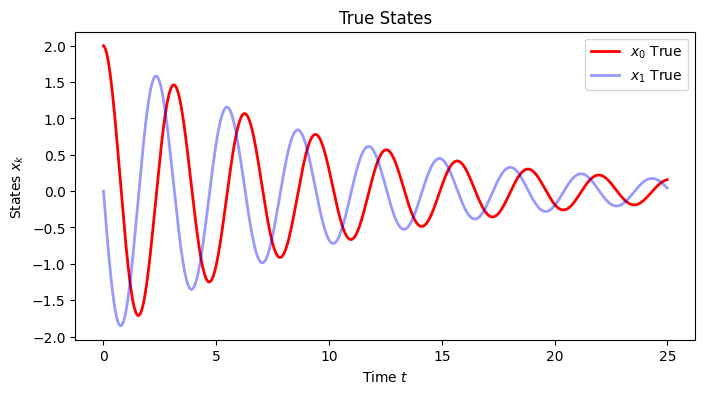

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))  # 1 row, 2 columns
ax.plot(t_train, x_train[:, 0], "r", label=r"$x_0$ True ", linewidth=2)
ax.plot(t_train, x_train[:, 1], "b", label=r"$x_1$ True ", alpha=0.4, linewidth=2)
ax.set_xlabel("Time $t$")
ax.set_ylabel(r"States $x_k$")
ax.legend()
ax.set_title("True States")

The result has shape of (2500,2) which corrospnds to 2500 time measurement points and 2 features of $\dot{x}$ and $\dot{y}$. 

In [12]:
# Fit the model
degree=7
matrix_theta=Theta(x_train,t_train,degree,True,False,False,False, outputLog=True)
      


Building Θ matrix with 2500 samples and 64 columns.
Including polynomial terms in x...
  Polynomial term (1): Column 0
  Polynomial term (x2): Column 1
  Polynomial term (x2^2): Column 2
  Polynomial term (x2^3): Column 3
  Polynomial term (x2^4): Column 4
  Polynomial term (x2^5): Column 5
  Polynomial term (x2^6): Column 6
  Polynomial term (x2^7): Column 7
  Polynomial term (x1): Column 8
  Polynomial term (x1x2): Column 9
  Polynomial term (x1x2^2): Column 10
  Polynomial term (x1x2^3): Column 11
  Polynomial term (x1x2^4): Column 12
  Polynomial term (x1x2^5): Column 13
  Polynomial term (x1x2^6): Column 14
  Polynomial term (x1x2^7): Column 15
  Polynomial term (x1^2): Column 16
  Polynomial term (x1^2x2): Column 17
  Polynomial term (x1^2x2^2): Column 18
  Polynomial term (x1^2x2^3): Column 19
  Polynomial term (x1^2x2^4): Column 20
  Polynomial term (x1^2x2^5): Column 21
  Polynomial term (x1^2x2^6): Column 22
  Polynomial term (x1^2x2^7): Column 23
  Polynomial term (x1^3): C

In [13]:
print(matrix_theta.shape)

(2500, 64)


In [14]:
# Calculate time derivatives (dx/dt)
dxdt = np.array([np.gradient(x_train[:, i], dt) for i in range(x_train.shape[1])]).T  # shape: (samples, features)


In [15]:
# Fit Adaptive Lasso for each state variable (i.e., for each feature in x_train)
coefficients = np.zeros((matrix_theta.shape[1], x_train.shape[1]))
for i in range(x_train.shape[1]):
    print(f"\nFitting variable {i}:")
    coefficients[:, i] = alasso(matrix_theta, dxdt[:, i], alpha=0.0000108)


Fitting variable 0:

Iteration Weight Δ       Coef Δ         L1 Norm        Max Coef       Nonzero Coefs  
--------------------------------------------------------------------------------
0         5.938e+15      1.002e+00      2.108e+00      2.000e+00      26             
1         3.748e+15      5.939e+07      2.100e+00      2.000e+00      2              
2         8.166e-11      9.688e+07      2.100e+00      2.000e+00      2              
3         6.050e-16      9.688e+07      2.100e+00      2.000e+00      2              
Converged after 3 iterations

Fitting variable 1:

Iteration Weight Δ       Coef Δ         L1 Norm        Max Coef       Nonzero Coefs  
--------------------------------------------------------------------------------
0         6.250e+15      1.033e+00      2.104e+00      2.000e+00      24             
1         3.436e+15      6.251e+07      2.100e+00      2.000e+00      2              
2         7.821e-11      9.688e+07      2.100e+00      2.000e+00      2      

In [16]:
powers=monomial_exponents(x_train.shape[1],degree)
print(powers)

coefficients

[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (3, 0), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (4, 7), (5, 0), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (5, 7), (6, 0), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6), (6, 7), (7, 0), (7, 1), (7, 2), (7, 3), (7, 4), (7, 5), (7, 6), (7, 7)]


array([[ 0.        ,  0.        ],
       [ 2.00033964, -0.09990757],
       [ 0.        ,  0.        ],
       [-0.        , -0.        ],
       [ 0.        , -0.        ],
       [ 0.        , -0.        ],
       [-0.        , -0.        ],
       [ 0.        ,  0.        ],
       [-0.09992209, -2.00036456],
       [-0.        ,  0.        ],
       [-0.        , -0.        ],
       [-0.        , -0.        ],
       [-0.        , -0.        ],
       [ 0.        , -0.        ],
       [-0.        ,  0.        ],
       [ 0.        , -0.        ],
       [-0.        ,  0.        ],
       [-0.        , -0.        ],
       [ 0.        ,  0.        ],
       [-0.        , -0.        ],
       [ 0.        ,  0.        ],
       [-0.        , -0.        ],
       [ 0.        ,  0.        ],
       [-0.        , -0.        ],
       [-0.        ,  0.        ],
       [-0.        ,  0.        ],
       [ 0.        , -0.        ],
       [-0.        ,  0.        ],
       [ 0.        ,

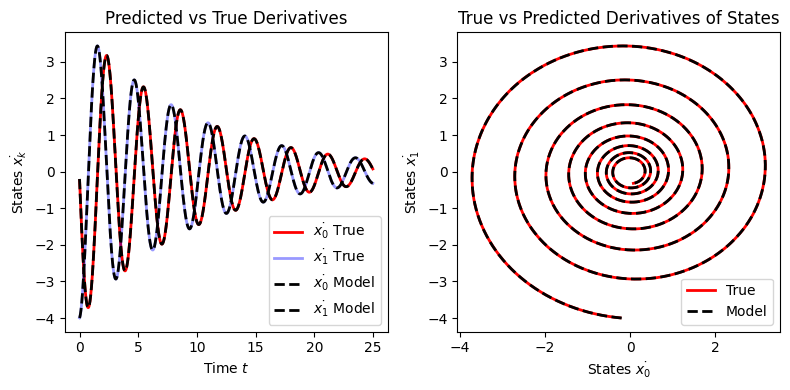

In [17]:
# Actual solution from the original system (x_train)
# Compute Theta_x for all time steps at once (this is the monomial terms for each state)
Theta_x_all = np.array([np.prod(np.power(x_train, power), axis=1) for power in powers]).T  # Shape: (num_samples, num_monomial_terms)

# Predicted derivatives using ve|ctorized matrix multiplication (Theta_x * zeta)
x_sim = np.dot(Theta_x_all, coefficients)  # Shape: (num_samples, num_state_variables)

# Create a figure with 1 row and 2 columns (for side-by-side plots)
fig, ax = plt.subplots(1, 2, figsize=(8, 4))  # 1 row, 2 columns

# First plot: Predicted vs True Derivatives
ax[0].plot(t_train, dxdt[:, 0], "r", label=r"$\dot{x_0}$ True ", linewidth=2)
ax[0].plot(t_train, dxdt[:, 1], "b", label=r"$\dot{x_1}$ True ", alpha=0.4, linewidth=2)
ax[0].plot(t_train, x_sim[:, 0], "k--", label=r"$\dot{x_0}$ Model", linewidth=2)
ax[0].plot(t_train, x_sim[:, 1], "k--", label=r"$\dot{x_1}$ Model", linewidth=2)
ax[0].set_xlabel("Time $t$")
ax[0].set_ylabel(r"States $\dot{x_k}$")
ax[0].legend()
ax[0].set_title("Predicted vs True Derivatives")

# Second plot: True vs Predicted States
ax[1].plot(dxdt[:, 0], dxdt[:, 1], "r", label="True", linewidth=2)
ax[1].plot(x_sim[:, 0], x_sim[:, 1], "k--", label="Model", linewidth=2)
ax[1].set_xlabel(r"States $\dot{x_0}$")
ax[1].set_ylabel(r"States $\dot{x_1}$")
ax[1].legend()
ax[1].set_title("True vs Predicted Derivatives of States")
# Adjust layout for better spacing
plt.tight_layout()
# Show the plots
plt.show()


In [18]:
# Time step size (assumes uniform time grid)
dt = t_train[1] - t_train[0]

# Initial state of the system (first sample from training data)
x0_train = x_train[0]

# Initialize the list to hold the reconstructed trajectory using RK4
x_manual = [x0_train]

# Define the learned dynamics as a function using the SINDy model
def f(x):
    # Evaluate the Theta library at the current state `x`
    # Theta uses only state variables (no time, no trig terms, no time polynomial)
    theta_x = Theta(x.reshape(1, -1),              # reshape to 2D (1, n_features)
                    np.array([0.0]),               # dummy time input (not used)
                    degree,                        # max polynomial degree
                    True, False, False, False,     # only use polynomial in x
                    outputLog=False)               # suppress logging
    # Compute the time derivative using the learned sparse coefficients
    return (theta_x @ coefficients).flatten()      # result is (n_features,) vector

# Perform RK4 integration over the time grid to reconstruct the system trajectory
for t in t_train[:-1]:                             # loop over all time steps except last
    x_current = x_manual[-1]                       # current state from previous RK4 step

    # Runge-Kutta 4th order steps
    k1 = f(x_current)                              # slope at beginning
    k2 = f(x_current + 0.5 * dt * k1)              # slope at midpoint (Euler step)
    k3 = f(x_current + 0.5 * dt * k2)              # improved midpoint slope
    k4 = f(x_current + dt * k3)                    # slope at next full time step

    # Combine RK4 increments to compute next state
    x_next = x_current + (dt / 6) * (k1 + 2*k2 + 2*k3 + k4)

    # Append next state to trajectory
    x_manual.append(x_next)

# Convert list of states to NumPy array for analysis or plotting
x_latent_sindy = np.array(x_manual)

Text(0.5, 1.0, 'Phase Space Trajectories')

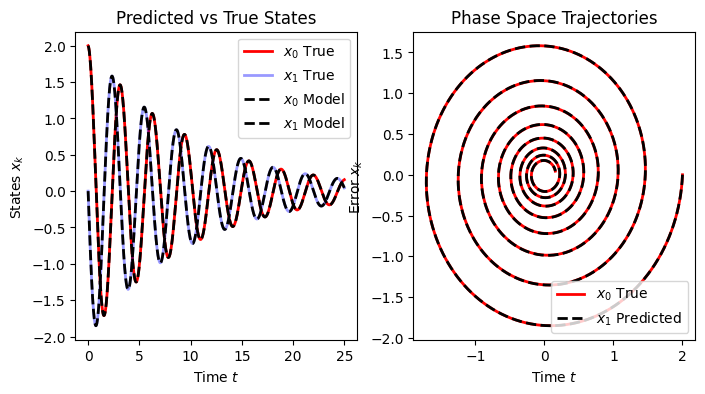

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))  # 1 row, 2 columns

# First plot: Predicted vs True Derivatives
ax[0].plot(t_train, x_train[:, 0], "r", label=r"${x_0}$ True ", linewidth=2)
ax[0].plot(t_train, x_train[:, 1], "b", label=r"${x_1}$ True ", alpha=0.4, linewidth=2)
ax[0].plot(t_train, x_latent_sindy[:, 0], "k--", label=r"${x_0}$ Model", linewidth=2)
ax[0].plot(t_train, x_latent_sindy[:, 1], "k--", label=r"${x_1}$ Model", linewidth=2)
ax[0].set_xlabel("Time $t$")
ax[0].set_ylabel(r"States ${x_k}$")
ax[0].legend()
ax[0].set_title("Predicted vs True States")

ax[1].plot(x_train[:, 0], x_train[:, 1], "r", label=r"${x_0}$ True ", linewidth=2)
ax[1].plot(x_latent_sindy[:, 0], x_latent_sindy[:, 1], "k--", label=r"${x_1}$ Predicted ", linewidth=2)
ax[1].set_xlabel("Time $t$")
ax[1].set_ylabel(r"Error ${x_k}$")
ax[1].legend()
ax[1].set_title("Phase Space Trajectories")

- This block performs numerical integration of the SINDy model using RK4.

- It reconstructs the latent trajectory of the system given learned coefficients.

- f(x) uses the learned Θ library and coefficients to compute the system's time derivative.

- Integration is done step-by-step, starting from the initial condition, to generate the full predicted trajectory: x_latent_sindy.

- Solves ODEs by computing the next state using a weighted combination of slopes at multiple points within a time step.

- Balances accuracy and computational cost better than Euler’s method.

In [20]:
# Compute the model error
error_x0 = np.linalg.norm(x_sim[:, 0] - dxdt[:, 0])/np.linalg.norm(x_sim[:, 0])
error_x1 = np.linalg.norm(x_sim[:, 1] - dxdt[:, 1])/np.linalg.norm(x_sim[:, 1])
print(f"Error for x0: {error_x0*100} %")
print(f"Error for x1: {error_x1*100} %")

Error for x0: 0.11406865776569207 %
Error for x1: 0.10177687505193778 %


In [21]:
# Compute the trajectory error
error_x0 = np.linalg.norm(x_train[:, 0] - x_latent_sindy[:, 0])/np.linalg.norm(x_train[:, 0])
error_x1 = np.linalg.norm(x_train[:, 1] - x_latent_sindy[:, 1])/np.linalg.norm(x_train[:, 1])
print(f"Error for x0: {error_x0*100} %")
print(f"Error for x1: {error_x1*100} %")

Error for x0: 0.21289720984228694 %
Error for x1: 0.21531995547225286 %


## Example 2: Linear ODE of a particle trajectory


Suppose we have measurements of the position of a particle obeying the following dynamical system at different points in time:

$$
	\frac{d}{dt} \begin{bmatrix} x \\ y \end{bmatrix}
	= \begin{bmatrix} -2x \\ y \end{bmatrix}
	= \begin{bmatrix} -2 & 0 \\ 0 & 1 \end{bmatrix}
	\begin{bmatrix} x \\ y \end{bmatrix}
$$

Note that this system of differential equations decouples into two differential equations whose solutions are simply $x(t) = x_0e^{-2t}$ and $y(t) = y_0e^t$, where $x_0 = x(0)$ and $y_0=y(0)$ are the initial conditions.

Using the initial conditions $x_0 = 3$ and $y_0 = \tfrac{1}{2}$, we construct the data matrix $X$.

In [22]:
x0, y0, t_min, t_max, num_points = 0.3, 0.05, 0, 5, 1000
x0_train = [2, 0]
dt=(t_max-t_min)/num_points
t_train = np.linspace(t_min, t_max, num_points)
t_train_span = (t_train[0], t_train[-1])
x_t = x0 * np.exp(-2 * t_train)
y_t = y0 * np.exp(t_train)
x_train = np.column_stack([x_t, y_t])


Text(0.5, 1.0, 'True States')

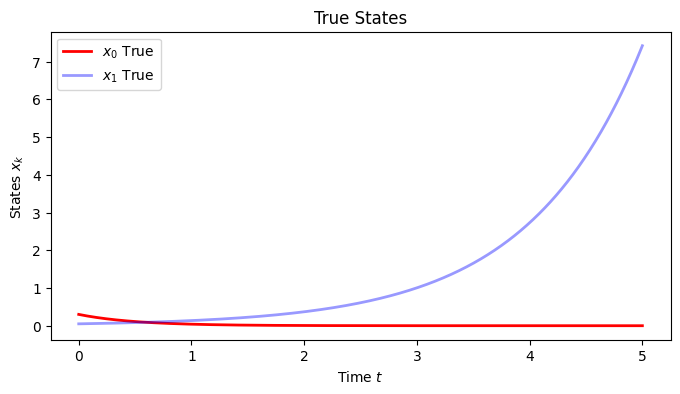

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))  # 1 row, 2 columns
ax.plot(t_train, x_train[:, 0], "r", label=r"$x_0$ True ", linewidth=2)
ax.plot(t_train, x_train[:, 1], "b", label=r"$x_1$ True ", alpha=0.4, linewidth=2)
ax.set_xlabel("Time $t$")
ax.set_ylabel(r"States $x_k$")
ax.legend()
ax.set_title("True States")

In [24]:
# Fit the model
degree=3
matrix_theta=Theta(x_train,t_train,degree,True,False,False,False, outputLog=True)

# Calculate time derivatives (dx/dt)
dxdt = np.array([np.gradient(x_train[:, i], dt) for i in range(x_train.shape[1])]).T  # shape: (samples, features)

# Fit Adaptive Lasso for each state variable (i.e., for each feature in x_train)
coefficients = np.zeros((matrix_theta.shape[1], x_train.shape[1]))
for i in range(x_train.shape[1]):
    print(f"\nFitting variable {i}:")
    coefficients[:, i] = alasso(matrix_theta, dxdt[:, i], alpha=0.000015, lasso_tol=1e-5, alasso_tol=1e-6)


Building Θ matrix with 1000 samples and 16 columns.
Including polynomial terms in x...
  Polynomial term (1): Column 0
  Polynomial term (x2): Column 1
  Polynomial term (x2^2): Column 2
  Polynomial term (x2^3): Column 3
  Polynomial term (x1): Column 4
  Polynomial term (x1x2): Column 5
  Polynomial term (x1x2^2): Column 6
  Polynomial term (x1x2^3): Column 7
  Polynomial term (x1^2): Column 8
  Polynomial term (x1^2x2): Column 9
  Polynomial term (x1^2x2^2): Column 10
  Polynomial term (x1^2x2^3): Column 11
  Polynomial term (x1^3): Column 12
  Polynomial term (x1^3x2): Column 13
  Polynomial term (x1^3x2^2): Column 14
  Polynomial term (x1^3x2^3): Column 15

Fitting variable 0:

Iteration Weight Δ       Coef Δ         L1 Norm        Max Coef       Nonzero Coefs  
--------------------------------------------------------------------------------
0         6.875e+15      1.125e+00      1.997e+00      1.996e+00      5              
1         2.499e+15      6.876e+07      2.000e+00     

In [25]:
powers=monomial_exponents(x_train.shape[1],degree)
print(powers)

coefficients

[(0, 0), (0, 1), (0, 2), (0, 3), (1, 0), (1, 1), (1, 2), (1, 3), (2, 0), (2, 1), (2, 2), (2, 3), (3, 0), (3, 1), (3, 2), (3, 3)]


array([[-0.        ,  0.        ],
       [-0.        ,  1.00097752],
       [-0.        , -0.        ],
       [-0.        , -0.        ],
       [-2.00018523,  0.        ],
       [-0.        ,  0.        ],
       [-0.        ,  0.        ],
       [-0.        ,  0.        ],
       [-0.        ,  0.        ],
       [-0.        ,  0.        ],
       [-0.        ,  0.        ],
       [-0.        ,  0.        ],
       [-0.        ,  0.        ],
       [-0.        ,  0.        ],
       [-0.        ,  0.        ],
       [-0.        ,  0.        ]])

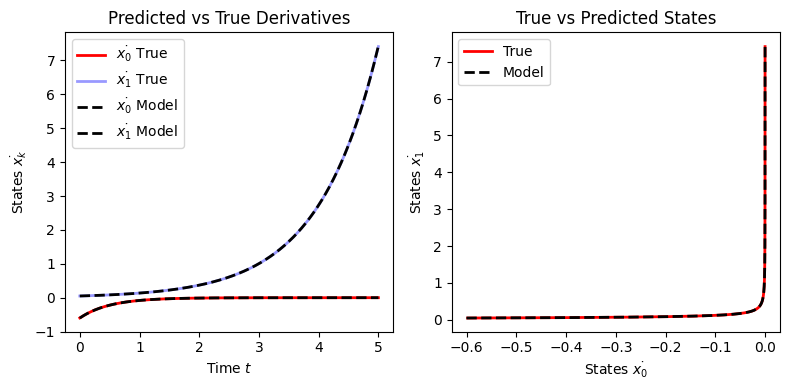

In [26]:
# Actual solution from the original system (x_train)
# Compute Theta_x for all time steps at once (this is the monomial terms for each state)
Theta_x_all = np.array([np.prod(np.power(x_train, power), axis=1) for power in powers]).T  # Shape: (num_samples, num_monomial_terms)

# Predicted derivatives using ve|ctorized matrix multiplication (Theta_x * zeta)
x_sim = np.dot(Theta_x_all, coefficients)  # Shape: (num_samples, num_state_variables)

# Create a figure with 1 row and 2 columns (for side-by-side plots)
fig, ax = plt.subplots(1, 2, figsize=(8, 4))  # 1 row, 2 columns

# First plot: Predicted vs True Derivatives
ax[0].plot(t_train, dxdt[:, 0], "r", label=r"$\dot{x_0}$ True ", linewidth=2)
ax[0].plot(t_train, dxdt[:, 1], "b", label=r"$\dot{x_1}$ True ", alpha=0.4, linewidth=2)
ax[0].plot(t_train, x_sim[:, 0], "k--", label=r"$\dot{x_0}$ Model", linewidth=2)
ax[0].plot(t_train, x_sim[:, 1], "k--", label=r"$\dot{x_1}$ Model", linewidth=2)
ax[0].set_xlabel("Time $t$")
ax[0].set_ylabel(r"States $\dot{x_k}$")
ax[0].legend()
ax[0].set_title("Predicted vs True Derivatives")

# Second plot: True vs Predicted States
ax[1].plot(dxdt[:, 0], dxdt[:, 1], "r", label="True", linewidth=2)
ax[1].plot(x_sim[:, 0], x_sim[:, 1], "k--", label="Model", linewidth=2)
ax[1].set_xlabel(r"States $\dot{x_0}$")
ax[1].set_ylabel(r"States $\dot{x_1}$")
ax[1].legend()
ax[1].set_title("True vs Predicted States")
# Adjust layout for better spacing
plt.tight_layout()
# Show the plots
plt.show()


In [27]:
# Time step size (assumes uniform time grid)
dt = t_train[1] - t_train[0]

# Initial state of the system (first sample from training data)
x0_train = x_train[0]

# Initialize the list to hold the reconstructed trajectory using RK4
x_manual = [x0_train]

# Define the learned dynamics as a function using the SINDy model
def f(x):
    # Evaluate the Theta library at the current state `x`
    # Theta uses only state variables (no time, no trig terms, no time polynomial)
    theta_x = Theta(x.reshape(1, -1),              # reshape to 2D (1, n_features)
                    np.array([0.0]),               # dummy time input (not used)
                    degree,                        # max polynomial degree
                    True, False, False, False,     # only use polynomial in x
                    outputLog=False)               # suppress logging
    # Compute the time derivative using the learned sparse coefficients
    return (theta_x @ coefficients).flatten()      # result is (n_features,) vector

# Perform RK4 integration over the time grid to reconstruct the system trajectory
for t in t_train[:-1]:                             # loop over all time steps except last
    x_current = x_manual[-1]                       # current state from previous RK4 step

    # Runge-Kutta 4th order steps
    k1 = f(x_current)                              # slope at beginning
    k2 = f(x_current + 0.5 * dt * k1)              # slope at midpoint (Euler step)
    k3 = f(x_current + 0.5 * dt * k2)              # improved midpoint slope
    k4 = f(x_current + dt * k3)                    # slope at next full time step

    # Combine RK4 increments to compute next state
    x_next = x_current + (dt / 6) * (k1 + 2*k2 + 2*k3 + k4)

    # Append next state to trajectory
    x_manual.append(x_next)

# Convert list of states to NumPy array for analysis or plotting
x_latent_sindy = np.array(x_manual)

Text(0.5, 1.0, 'Phase Space Trajectories')

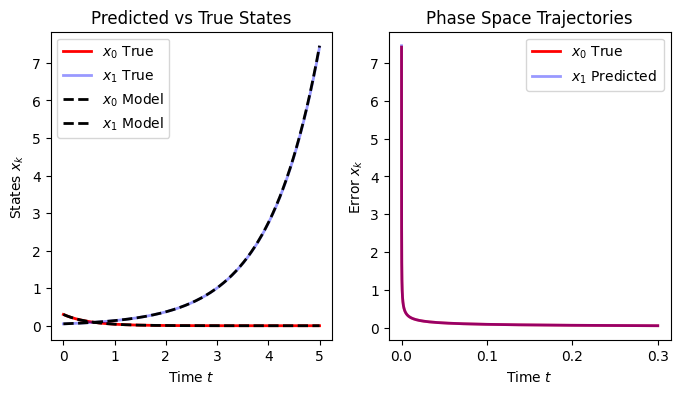

In [28]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))  # 1 row, 2 columns

# First plot: Predicted vs True Derivatives
ax[0].plot(t_train, x_train[:, 0], "r", label=r"${x_0}$ True ", linewidth=2)
ax[0].plot(t_train, x_train[:, 1], "b", label=r"${x_1}$ True ", alpha=0.4, linewidth=2)
ax[0].plot(t_train, x_latent_sindy[:, 0], "k--", label=r"${x_0}$ Model", linewidth=2)
ax[0].plot(t_train, x_latent_sindy[:, 1], "k--", label=r"${x_1}$ Model", linewidth=2)
ax[0].set_xlabel("Time $t$")
ax[0].set_ylabel(r"States ${x_k}$")
ax[0].legend()
ax[0].set_title("Predicted vs True States")

ax[1].plot(x_train[:, 0], x_train[:, 1], "r", label=r"${x_0}$ True ", linewidth=2)
ax[1].plot(x_latent_sindy[:, 0], x_latent_sindy[:, 1], "b", label=r"${x_1}$ Predicted ", alpha=0.4, linewidth=2)
ax[1].set_xlabel("Time $t$")
ax[1].set_ylabel(r"Error ${x_k}$")
ax[1].legend()
ax[1].set_title("Phase Space Trajectories")

In [29]:
# Compute the model error
error_x0 = np.linalg.norm(x_sim[:, 0] - dxdt[:, 0])/np.linalg.norm(x_sim[:, 0])
error_x1 = np.linalg.norm(x_sim[:, 1] - dxdt[:, 1])/np.linalg.norm(x_sim[:, 1])
print(f"Error for x0: {error_x0*100} %")
print(f"Error for x1: {error_x1*100} %")

Error for x0: 0.10813802880304384 %
Error for x1: 0.024853577215919437 %


In [30]:
# Compute the trajectory error
error_x0 = np.linalg.norm(x_train[:, 0] - x_latent_sindy[:, 0])/np.linalg.norm(x_train[:, 0])
error_x1 = np.linalg.norm(x_train[:, 1] - x_latent_sindy[:, 1])/np.linalg.norm(x_train[:, 1])
print(f"Error for x0: {error_x0*100} %")
print(f"Error for x1: {error_x1*100} %")

Error for x0: 0.006515831539490038 %
Error for x1: 0.4438403433259235 %


## Example 3: Cubic ODE

The second example is a nonlinear two-dimensional damped harmonic oscillator. This example involves cubic dynamics. The governing system used to generate training data is as follows. It is identical to the previous example except the linear terms in the right-hand side have been replaced with cubic ones.

$$ \begin{aligned} \dot{x} &= -0.1{x}^3 + 2{y}^3 \\ \dot{y} &= -2{x}^3 -0.1{y}^3 \end{aligned} $$

## System Overview
<img src="animation2.gif" width="200" />

- Dynamics are governed by cubic non‑linearities rather than linear terms:

- Dynamics are governed by cubic non‑linearities rather than linear terms:

- Damping: Terms proportional to and dissipate energy, drawing orbits inward, not linearly but depending on cubic power of amplitude.

- Nonlinear coupling: Energy interchange between 𝑥 and y modes—similar to a “twisted” center manifold with more complex basin of attraction than in linear systems.

## Observable Behavior

Trajectories:

  - Decay to origin, but not along straight lines—curved spirals influenced by cubic terms.

  - Show richer behavior compared to linear case: may approach attractor with subtle distortions, uneven amplitude modulation.

## Phase Portrait:

- Distorted spirals reflecting nonlinear damping.

- Possibly non-circular, with symmetry depending on cubic term interaction.

- Represents systems where restoring and damping forces increase disproportionately with displacement—e.g., stiff mechanical springs or fluids with drag increasing cubically.

- When small → behaves somewhat like linear oscillator; when large → strong damping and coupling, hence amplitude‐dependent dynamics.



In [31]:
# Cubic, damped harmonic oscillator
def cubic_damped_SHO(t, x):
    return [
        -0.1 * x[0] ** 3 + 2 * x[1] ** 3,
        -2 * x[0] ** 3 - 0.1 * x[1] ** 3,
    ]

In [32]:
# Generate training data

dt = 0.01
t_train = np.arange(0, 25, dt)
t_train_span = (t_train[0], t_train[-1])
x0_train = [2, 0]
x_train = solve_ivp(cubic_damped_SHO, t_train_span, 
                    x0_train, t_eval=t_train).y.T

Text(0.5, 1.0, 'True States')

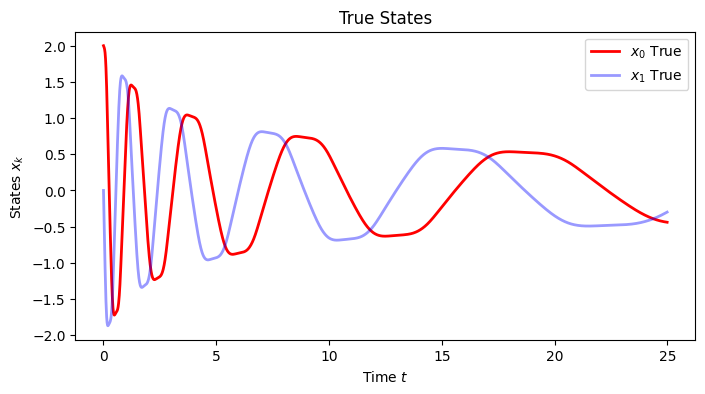

In [33]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))  # 1 row, 2 columns
ax.plot(t_train, x_train[:, 0], "r", label=r"$x_0$ True ", linewidth=2)
ax.plot(t_train, x_train[:, 1], "b", label=r"$x_1$ True ", alpha=0.4, linewidth=2)
ax.set_xlabel("Time $t$")
ax.set_ylabel(r"States $x_k$")
ax.legend()
ax.set_title("True States")

In [34]:
# Fit the model
degree=5
matrix_theta=Theta(x_train,t_train,degree,True,False,False,False, outputLog=True)

# Calculate time derivatives (dx/dt)
dxdt = np.array([np.gradient(x_train[:, i], dt) for i in range(x_train.shape[1])]).T  # shape: (samples, features)

# Fit Adaptive Lasso for each state variable (i.e., for each feature in x_train)
coefficients = np.zeros((matrix_theta.shape[1], x_train.shape[1]))
for i in range(x_train.shape[1]):
    print(f"\nFitting variable {i}:")
    coefficients[:, i] = alasso(matrix_theta, dxdt[:, i], alpha=0.00005)


Building Θ matrix with 2500 samples and 36 columns.
Including polynomial terms in x...
  Polynomial term (1): Column 0
  Polynomial term (x2): Column 1
  Polynomial term (x2^2): Column 2
  Polynomial term (x2^3): Column 3
  Polynomial term (x2^4): Column 4
  Polynomial term (x2^5): Column 5
  Polynomial term (x1): Column 6
  Polynomial term (x1x2): Column 7
  Polynomial term (x1x2^2): Column 8
  Polynomial term (x1x2^3): Column 9
  Polynomial term (x1x2^4): Column 10
  Polynomial term (x1x2^5): Column 11
  Polynomial term (x1^2): Column 12
  Polynomial term (x1^2x2): Column 13
  Polynomial term (x1^2x2^2): Column 14
  Polynomial term (x1^2x2^3): Column 15
  Polynomial term (x1^2x2^4): Column 16
  Polynomial term (x1^2x2^5): Column 17
  Polynomial term (x1^3): Column 18
  Polynomial term (x1^3x2): Column 19
  Polynomial term (x1^3x2^2): Column 20
  Polynomial term (x1^3x2^3): Column 21
  Polynomial term (x1^3x2^4): Column 22
  Polynomial term (x1^3x2^5): Column 23
  Polynomial term (x1

In [35]:
powers=monomial_exponents(x_train.shape[1],degree)
print(powers)

coefficients

[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (3, 0), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (5, 0), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5)]


array([[ 0.        , -0.        ],
       [-0.        ,  0.        ],
       [ 0.        , -0.        ],
       [ 1.99434991, -0.09842406],
       [ 0.        , -0.        ],
       [ 0.        , -0.        ],
       [ 0.        ,  0.        ],
       [-0.        , -0.        ],
       [ 0.        ,  0.        ],
       [-0.        , -0.        ],
       [ 0.        ,  0.        ],
       [-0.        , -0.        ],
       [ 0.        , -0.        ],
       [-0.        ,  0.        ],
       [ 0.        , -0.        ],
       [-0.        ,  0.        ],
       [ 0.        , -0.        ],
       [-0.        ,  0.        ],
       [-0.09902819, -1.99521241],
       [-0.        , -0.        ],
       [ 0.        ,  0.        ],
       [-0.        , -0.        ],
       [ 0.        ,  0.        ],
       [-0.        , -0.        ],
       [ 0.        , -0.        ],
       [-0.        ,  0.        ],
       [ 0.        , -0.        ],
       [-0.        ,  0.        ],
       [ 0.        ,

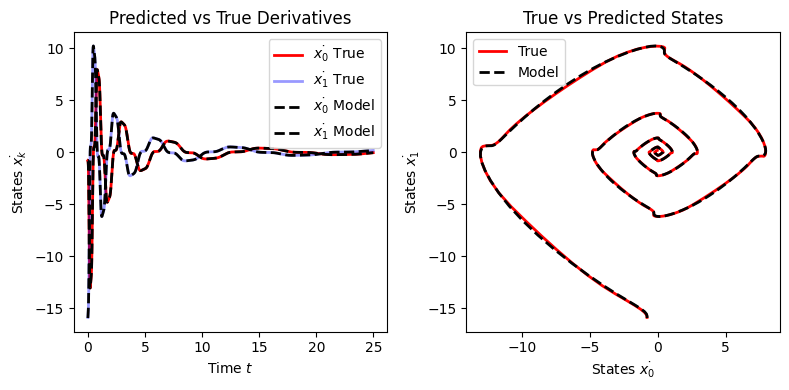

In [36]:
# Actual solution from the original system (x_train)
# Compute Theta_x for all time steps at once (this is the monomial terms for each state)
Theta_x_all = np.array([np.prod(np.power(x_train, power), axis=1) for power in powers]).T  # Shape: (num_samples, num_monomial_terms)

# Predicted derivatives using ve|ctorized matrix multiplication (Theta_x * zeta)
x_sim = np.dot(Theta_x_all, coefficients)  # Shape: (num_samples, num_state_variables)

# Create a figure with 1 row and 2 columns (for side-by-side plots)
fig, ax = plt.subplots(1, 2, figsize=(8, 4))  # 1 row, 2 columns

# First plot: Predicted vs True Derivatives
ax[0].plot(t_train, dxdt[:, 0], "r", label=r"$\dot{x_0}$ True ", linewidth=2)
ax[0].plot(t_train, dxdt[:, 1], "b", label=r"$\dot{x_1}$ True ", alpha=0.4, linewidth=2)
ax[0].plot(t_train, x_sim[:, 0], "k--", label=r"$\dot{x_0}$ Model", linewidth=2)
ax[0].plot(t_train, x_sim[:, 1], "k--", label=r"$\dot{x_1}$ Model", linewidth=2)
ax[0].set_xlabel("Time $t$")
ax[0].set_ylabel(r"States $\dot{x_k}$")
ax[0].legend()
ax[0].set_title("Predicted vs True Derivatives")

# Second plot: True vs Predicted States
ax[1].plot(dxdt[:, 0], dxdt[:, 1], "r", label="True", linewidth=2)
ax[1].plot(x_sim[:, 0], x_sim[:, 1], "k--", label="Model", linewidth=2)
ax[1].set_xlabel(r"States $\dot{x_0}$")
ax[1].set_ylabel(r"States $\dot{x_1}$")
ax[1].legend()
ax[1].set_title("True vs Predicted States")
# Adjust layout for better spacing
plt.tight_layout()
# Show the plots
plt.show()


In [37]:
# Time step size (assumes uniform time grid)
dt = t_train[1] - t_train[0]

# Initial state of the system (first sample from training data)
x0_train = x_train[0]

# Initialize the list to hold the reconstructed trajectory using RK4
x_manual = [x0_train]

# Define the learned dynamics as a function using the SINDy model
def f(x):
    # Evaluate the Theta library at the current state `x`
    # Theta uses only state variables (no time, no trig terms, no time polynomial)
    theta_x = Theta(x.reshape(1, -1),              # reshape to 2D (1, n_features)
                    np.array([0.0]),               # dummy time input (not used)
                    degree,                        # max polynomial degree
                    True, False, False, False,     # only use polynomial in x
                    outputLog=False)               # suppress logging
    # Compute the time derivative using the learned sparse coefficients
    return (theta_x @ coefficients).flatten()      # result is (n_features,) vector

# Perform RK4 integration over the time grid to reconstruct the system trajectory
for t in t_train[:-1]:                             # loop over all time steps except last
    x_current = x_manual[-1]                       # current state from previous RK4 step

    # Runge-Kutta 4th order steps
    k1 = f(x_current)                              # slope at beginning
    k2 = f(x_current + 0.5 * dt * k1)              # slope at midpoint (Euler step)
    k3 = f(x_current + 0.5 * dt * k2)              # improved midpoint slope
    k4 = f(x_current + dt * k3)                    # slope at next full time step

    # Combine RK4 increments to compute next state
    x_next = x_current + (dt / 6) * (k1 + 2*k2 + 2*k3 + k4)

    # Append next state to trajectory
    x_manual.append(x_next)

# Convert list of states to NumPy array for analysis or plotting
x_latent_sindy = np.array(x_manual)

Text(0.5, 1.0, 'Phase Space Trajectories')

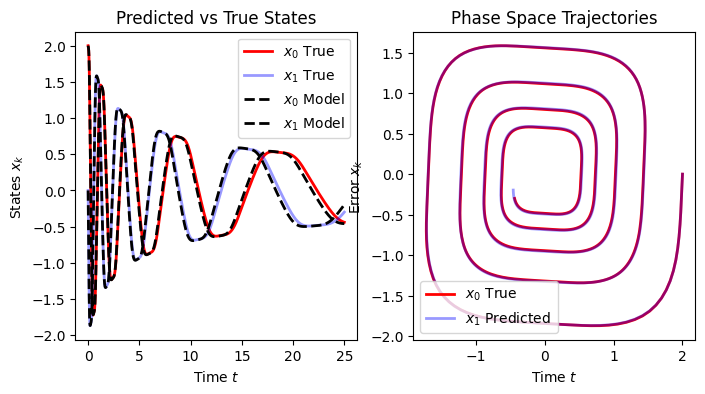

In [38]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))  # 1 row, 2 columns

# First plot: Predicted vs True Derivatives
ax[0].plot(t_train, x_train[:, 0], "r", label=r"${x_0}$ True ", linewidth=2)
ax[0].plot(t_train, x_train[:, 1], "b", label=r"${x_1}$ True ", alpha=0.4, linewidth=2)
ax[0].plot(t_train, x_latent_sindy[:, 0], "k--", label=r"${x_0}$ Model", linewidth=2)
ax[0].plot(t_train, x_latent_sindy[:, 1], "k--", label=r"${x_1}$ Model", linewidth=2)
ax[0].set_xlabel("Time $t$")
ax[0].set_ylabel(r"States ${x_k}$")
ax[0].legend()
ax[0].set_title("Predicted vs True States")

ax[1].plot(x_train[:, 0], x_train[:, 1], "r", label=r"${x_0}$ True ", linewidth=2)
ax[1].plot(x_latent_sindy[:, 0], x_latent_sindy[:, 1], "b", label=r"${x_1}$ Predicted ", alpha=0.4, linewidth=2)
ax[1].set_xlabel("Time $t$")
ax[1].set_ylabel(r"Error ${x_k}$")
ax[1].legend()
ax[1].set_title("Phase Space Trajectories")

In [39]:
# Compute the model error
error_x0 = np.linalg.norm(x_sim[:, 0] - dxdt[:, 0])/np.linalg.norm(x_sim[:, 0])
error_x1 = np.linalg.norm(x_sim[:, 1] - dxdt[:, 1])/np.linalg.norm(x_sim[:, 1])
print(f"Error for x0: {error_x0*100} %")
print(f"Error for x1: {error_x1*100} %")

Error for x0: 0.8484676200575543 %
Error for x1: 0.7386630543323883 %


In [40]:
# Compute the trajectory error
error_x0 = np.linalg.norm(x_train[:, 0] - x_latent_sindy[:, 0])/np.linalg.norm(x_train[:, 0])
error_x1 = np.linalg.norm(x_train[:, 1] - x_latent_sindy[:, 1])/np.linalg.norm(x_train[:, 1])
print(f"Error for x0: {error_x0*100} %")
print(f"Error for x1: {error_x1*100} %")


Error for x0: 10.500586494658423 %
Error for x1: 9.580587393514389 %


## Example 4: Linear 3D ODE

Our final example of this section shows the application of SINDy to identify of a linear system in three dimensions. The governing equations are given by the following system.

$$ \begin{aligned} \dot{x} &= -0.1{x} -2{y} \\ \dot{y} &= 2{x} -0.1{y} \\ \dot{z} &= -0.3{z} \end{aligned}$$


<video width="600" controls>
  <source src="animation4.webm" type="video/webm">
  </video>

## Physical Interpretation:
<img src="animation3.gif" width="150" />


- (${x}$, ${y}$) plane:

  - This is a damped linear oscillator with rotational coupling between ${x}$ and ${y}$.

  - The terms ±2 ${x}$ and ±2 ${y}$ cause circular/oscillatory motion, similar to a rotating mass on a spring or electrical LC circuit.

  - The small coefficients -0.1 ${x}$ and -0.1 ${y}$ represent damping, so the oscillations decay over time.

  - Together, this results in spiral trajectories inward toward the origin — a stable focus.

- ${z}$-direction:

  - The term $\dot{z} = -0.3z$ is a simple exponential decay.

  - Represents independent damping, like a mode or variable that is not coupled to ${x}$ or ${y}$.

  - Could model a third state (e.g., temperature, chemical concentration) that decays to equilibrium.



In [41]:
# Linear 3D toy system
def linear_3D(t, x):
    return [-0.1 * x[0] - 2 * x[1], 2 * x[0] - 0.1 * x[1], -0.3 * x[2]]

In [42]:
# Generate training data

dt = .01
t_train = np.arange(0, 50, dt)
t_train_span = (t_train[0], t_train[-1])
x0_train = [2, 0, 1]
x_train = solve_ivp(linear_3D, t_train_span, 
                    x0_train, t_eval=t_train).y.T

In [43]:
# Fit the model
degree=5
matrix_theta=Theta(x_train,t_train,degree,True,False,False,False,outputLog=True)

# Calculate time derivatives (dx/dt)
dxdt = np.array([np.gradient(x_train[:, i], dt) for i in range(x_train.shape[1])]).T  # shape: (samples, features)

# Fit Adaptive Lasso for each state variable (i.e., for each feature in x_train)
coefficients = np.zeros((matrix_theta.shape[1], x_train.shape[1]))
for i in range(x_train.shape[1]):
    print(f"\nFitting variable {i}:")
    coefficients[:, i] = alasso(matrix_theta, dxdt[:, i], alpha=0.000001)


Building Θ matrix with 5000 samples and 216 columns.
Including polynomial terms in x...
  Polynomial term (1): Column 0
  Polynomial term (x3): Column 1
  Polynomial term (x3^2): Column 2
  Polynomial term (x3^3): Column 3
  Polynomial term (x3^4): Column 4
  Polynomial term (x3^5): Column 5
  Polynomial term (x2): Column 6
  Polynomial term (x2x3): Column 7
  Polynomial term (x2x3^2): Column 8
  Polynomial term (x2x3^3): Column 9
  Polynomial term (x2x3^4): Column 10
  Polynomial term (x2x3^5): Column 11
  Polynomial term (x2^2): Column 12
  Polynomial term (x2^2x3): Column 13
  Polynomial term (x2^2x3^2): Column 14
  Polynomial term (x2^2x3^3): Column 15
  Polynomial term (x2^2x3^4): Column 16
  Polynomial term (x2^2x3^5): Column 17
  Polynomial term (x2^3): Column 18
  Polynomial term (x2^3x3): Column 19
  Polynomial term (x2^3x3^2): Column 20
  Polynomial term (x2^3x3^3): Column 21
  Polynomial term (x2^3x3^4): Column 22
  Polynomial term (x2^3x3^5): Column 23
  Polynomial term (x

In [44]:
powers=monomial_exponents(x_train.shape[1],degree)
print(powers)

coefficients

[(0, 0, 0), (0, 0, 1), (0, 0, 2), (0, 0, 3), (0, 0, 4), (0, 0, 5), (0, 1, 0), (0, 1, 1), (0, 1, 2), (0, 1, 3), (0, 1, 4), (0, 1, 5), (0, 2, 0), (0, 2, 1), (0, 2, 2), (0, 2, 3), (0, 2, 4), (0, 2, 5), (0, 3, 0), (0, 3, 1), (0, 3, 2), (0, 3, 3), (0, 3, 4), (0, 3, 5), (0, 4, 0), (0, 4, 1), (0, 4, 2), (0, 4, 3), (0, 4, 4), (0, 4, 5), (0, 5, 0), (0, 5, 1), (0, 5, 2), (0, 5, 3), (0, 5, 4), (0, 5, 5), (1, 0, 0), (1, 0, 1), (1, 0, 2), (1, 0, 3), (1, 0, 4), (1, 0, 5), (1, 1, 0), (1, 1, 1), (1, 1, 2), (1, 1, 3), (1, 1, 4), (1, 1, 5), (1, 2, 0), (1, 2, 1), (1, 2, 2), (1, 2, 3), (1, 2, 4), (1, 2, 5), (1, 3, 0), (1, 3, 1), (1, 3, 2), (1, 3, 3), (1, 3, 4), (1, 3, 5), (1, 4, 0), (1, 4, 1), (1, 4, 2), (1, 4, 3), (1, 4, 4), (1, 4, 5), (1, 5, 0), (1, 5, 1), (1, 5, 2), (1, 5, 3), (1, 5, 4), (1, 5, 5), (2, 0, 0), (2, 0, 1), (2, 0, 2), (2, 0, 3), (2, 0, 4), (2, 0, 5), (2, 1, 0), (2, 1, 1), (2, 1, 2), (2, 1, 3), (2, 1, 4), (2, 1, 5), (2, 2, 0), (2, 2, 1), (2, 2, 2), (2, 2, 3), (2, 2, 4), (2, 2, 5), (2, 3, 0)

array([[ 0.        , -0.        , -0.        ],
       [ 0.        , -0.        , -0.29989802],
       [ 0.        , -0.        , -0.        ],
       [ 0.        , -0.        , -0.        ],
       [ 0.        , -0.        , -0.        ],
       [-0.        , -0.        , -0.        ],
       [-2.00046785, -0.10013356, -0.        ],
       [ 0.        , -0.        , -0.        ],
       [ 0.        ,  0.        , -0.        ],
       [ 0.        ,  0.        , -0.        ],
       [ 0.        ,  0.        , -0.        ],
       [ 0.        ,  0.        , -0.        ],
       [ 0.        , -0.        , -0.        ],
       [ 0.        ,  0.        , -0.        ],
       [ 0.        ,  0.        , -0.        ],
       [ 0.        ,  0.        , -0.        ],
       [ 0.        ,  0.        , -0.        ],
       [ 0.        ,  0.        , -0.        ],
       [ 0.        ,  0.        , -0.        ],
       [ 0.        ,  0.        , -0.        ],
       [ 0.        ,  0.        , -0.   

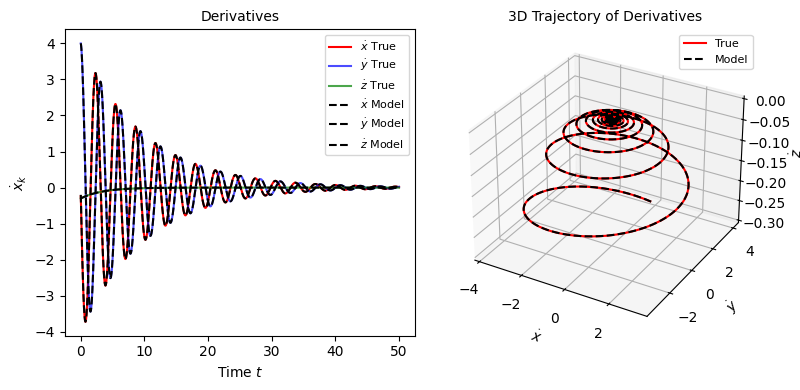

In [45]:
# Compute Theta_x for all time steps at once (this is the monomial terms for each state)
Theta_x_all = np.array([np.prod(np.power(x_train, power), axis=1) for power in powers]).T  # Shape: (num_samples, num_monomial_terms)

# Predicted derivatives using ve|ctorized matrix multiplication (Theta_x * zeta)
x_sim = np.dot(Theta_x_all, coefficients)  # Shape: (num_samples, num_state_variables)

# Create a compact figure: wide but not tall
fig = plt.figure(figsize=(8, 4))  # Width = 10, Height = 4
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1])

# --- First plot: Time series comparison ---
ax0 = fig.add_subplot(gs[0])

# True derivatives (colored solid)
ax0.plot(t_train, dxdt[:, 0], "r", label=r"$\dot{x}$ True", linewidth=1.5)
ax0.plot(t_train, dxdt[:, 1], "b", label=r"$\dot{y}$ True", linewidth=1.5, alpha=0.7)
ax0.plot(t_train, dxdt[:, 2], "g", label=r"$\dot{z}$ True", linewidth=1.5, alpha=0.7)

# Model predictions (black dashed)
ax0.plot(t_train, x_sim[:, 0], "k--", label=r"$\dot{x}$ Model", linewidth=1.5)
ax0.plot(t_train, x_sim[:, 1], "k--", label=r"$\dot{y}$ Model", linewidth=1.5)
ax0.plot(t_train, x_sim[:, 2], "k--", label=r"$\dot{z}$ Model", linewidth=1.5)

ax0.set_xlabel("Time $t$")
ax0.set_ylabel(r"$\dot{x}_k$")
ax0.set_title("Derivatives", fontsize=10)
ax0.legend(fontsize=8)

# --- Second plot: 3D trajectory ---
ax1 = fig.add_subplot(gs[1], projection="3d")
ax1.plot(dxdt[:, 0], dxdt[:, 1], dxdt[:, 2], "r", label="True", linewidth=1.5)
ax1.plot(x_sim[:, 0], x_sim[:, 1], x_sim[:, 2], "k--", label="Model", linewidth=1.5)
ax1.set_xlabel(r"$\dot{x}$")
ax1.set_ylabel(r"$\dot{y}$")
ax1.set_zlabel(r"$\dot{z}$")
ax1.set_title("3D Trajectory of Derivatives", fontsize=10)
ax1.legend(fontsize=8)
plt.tight_layout()
plt.show()

In [46]:
# Time step size (assumes uniform time grid)
dt = t_train[1] - t_train[0]

# Initial state of the system (first sample from training data)
x0_train = x_train[0]

# Initialize the list to hold the reconstructed trajectory using RK4
x_manual = [x0_train]

# Define the learned dynamics as a function using the SINDy model
def f(x):
    # Evaluate the Theta library at the current state `x`
    # Theta uses only state variables (no time, no trig terms, no time polynomial)
    theta_x = Theta(x.reshape(1, -1),              # reshape to 2D (1, n_features)
                    np.array([0.0]),               # dummy time input (not used)
                    degree,                        # max polynomial degree
                    True, False, False, False,     # only use polynomial in x
                    outputLog=False)               # suppress logging
    # Compute the time derivative using the learned sparse coefficients
    return (theta_x @ coefficients).flatten()      # result is (n_features,) vector

# Perform RK4 integration over the time grid to reconstruct the system trajectory
for t in t_train[:-1]:                             # loop over all time steps except last
    x_current = x_manual[-1]                       # current state from previous RK4 step

    # Runge-Kutta 4th order steps
    k1 = f(x_current)                              # slope at beginning
    k2 = f(x_current + 0.5 * dt * k1)              # slope at midpoint (Euler step)
    k3 = f(x_current + 0.5 * dt * k2)              # improved midpoint slope
    k4 = f(x_current + dt * k3)                    # slope at next full time step

    # Combine RK4 increments to compute next state
    x_next = x_current + (dt / 6) * (k1 + 2*k2 + 2*k3 + k4)

    # Append next state to trajectory
    x_manual.append(x_next)

# Convert list of states to NumPy array for analysis or plotting
x_latent_sindy = np.array(x_manual)

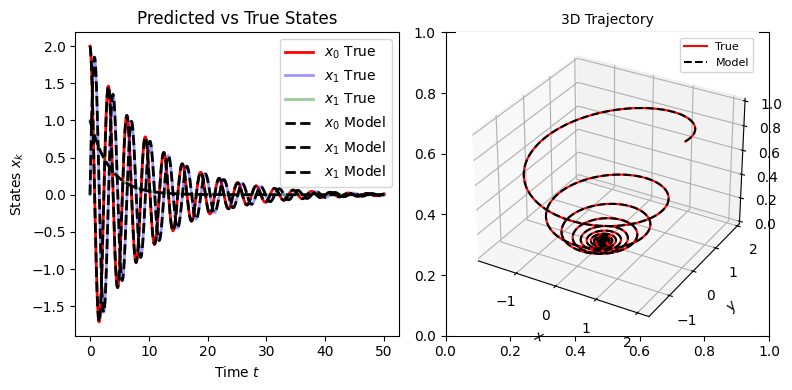

In [47]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))  # 1 row, 2 columns

# First plot: Predicted vs True Derivatives
ax[0].plot(t_train, x_train[:, 0], "r", label=r"${x_0}$ True ", linewidth=2)
ax[0].plot(t_train, x_train[:, 1], "b", label=r"${x_1}$ True ", alpha=0.4, linewidth=2)
ax[0].plot(t_train, x_train[:, 2], "g", label=r"${x_1}$ True ", alpha=0.4, linewidth=2)
ax[0].plot(t_train, x_latent_sindy[:, 0], "k--", label=r"${x_0}$ Model", linewidth=2)
ax[0].plot(t_train, x_latent_sindy[:, 1], "k--", label=r"${x_1}$ Model", linewidth=2)
ax[0].plot(t_train, x_latent_sindy[:, 2], "k--", label=r"${x_1}$ Model", linewidth=2)
ax[0].set_xlabel("Time $t$")
ax[0].set_ylabel(r"States ${x_k}$")
ax[0].legend()
ax[0].set_title("Predicted vs True States")


ax[1] = fig.add_subplot(gs[1], projection="3d")
ax[1].plot(x_train[:, 0], x_train[:, 1], x_train[:, 2], "r", label="True", linewidth=1.5)
ax[1].plot(x_latent_sindy[:, 0], x_latent_sindy[:, 1], x_latent_sindy[:, 2], "k--", label="Model", linewidth=1.5)
ax[1].set_xlabel(r"${x}$")
ax[1].set_ylabel(r"${y}$")
ax[1].set_zlabel(r"${z}$")
ax[1].set_title("3D Trajectory", fontsize=10)
ax[1].legend(fontsize=8)
plt.tight_layout()
plt.show()

In [48]:
# Compute the model error
error_x0 = np.linalg.norm(x_sim[:, 0] - dxdt[:, 0])/np.linalg.norm(x_sim[:, 0])
error_x1 = np.linalg.norm(x_sim[:, 1] - dxdt[:, 1])/np.linalg.norm(x_sim[:, 1])
error_x1 = np.linalg.norm(x_sim[:, 2] - dxdt[:, 2])/np.linalg.norm(x_sim[:, 2])
print(f"Error for x0: {error_x0*100} %")
print(f"Error for x1: {error_x1*100} %")

Error for x0: 0.13038789739898332 %
Error for x1: 0.03521157536196958 %


In [49]:
# Compute the trajectory error
error_x0 = np.linalg.norm(x_train[:, 0] - x_latent_sindy[:, 0])/np.linalg.norm(x_train[:, 0])
error_x1 = np.linalg.norm(x_train[:, 1] - x_latent_sindy[:, 1])/np.linalg.norm(x_train[:, 1])
error_x2 = np.linalg.norm(x_train[:, 2] - x_latent_sindy[:, 2])/np.linalg.norm(x_train[:, 2])
print(f"Error for x0: {error_x0*100} %")
print(f"Error for x1: {error_x1*100} %")
print(f"Error for x2: {error_x2*100} %")

Error for x0: 0.1279683279387541 %
Error for x1: 0.12939616079410265 %
Error for x2: 0.024005346711794953 %


## Example 5: CFD: Flow over a cylinder

In [50]:
def build_autoencoder(input_dim, layer_dim, activation='relu', optimizer='adam', loss='mse',
                      l2_weight=0, dropout_rate=0, use_batchnorm=False):
    """
    Builds an improved symmetrical autoencoder with optional BatchNorm, L2, Dropout.

    Parameters:
        input_dim (int): Input features
        layer_dim (list): Encoder layer sizes
        activation (str): Activation function
        optimizer (str or Optimizer): Optimizer
        loss (str): Loss function
        l2_weight (float): L2 regularization strength
        dropout_rate (float): Dropout rate (0.0 to disable)
        use_batchnorm (bool): Whether to use BatchNormalization

    Returns:
        autoencoder (Model): Compiled SAE
    """

    input_layer = Input(shape=(input_dim,))
    x = input_layer

    # Encoder
    for i, dim in enumerate(layer_dim):
        x = Dense(dim,
                  activation=activation,
                  kernel_regularizer=regularizers.l2(l2_weight),
                  name=f"encoder_dense_{i+1}")(x)
        if use_batchnorm:
            x = BatchNormalization(name=f"encoder_bn_{i+1}")(x)
        if dropout_rate > 0.0:
            x = Dropout(dropout_rate, name=f"encoder_dropout_{i+1}")(x)

    # Latent layer is x now

    # Decoder
    for i, dim in enumerate(reversed(layer_dim[:-1])):  # Skip last layer for symmetry
        x = Dense(dim,
                  activation=activation,
                  kernel_regularizer=regularizers.l2(l2_weight),
                  name=f"decoder_dense_{i+1}")(x)
        if use_batchnorm:
            x = BatchNormalization(name=f"decoder_bn_{i+1}")(x)
        if dropout_rate > 0.0:
            x = Dropout(dropout_rate, name=f"decoder_dropout_{i+1}")(x)

    # Output layer
    decoded = Dense(input_dim, name="output_dense")(x)

    # Build model
    autoencoder = Model(inputs=input_layer, outputs=decoded)
    optimizer1=AdamW(learning_rate=1e-2, weight_decay=1e-6)
    autoencoder.compile(optimizer=optimizer, loss=loss, metrics=['mse'])

    autoencoder.summary()
    return autoencoder

# `build_autoencoder` Function Overview

This function constructs a **symmetrical autoencoder** in Keras/TensorFlow with optional improvements:
- L2 Regularization
- Dropout
- Batch Normalization
- Custom activation, optimizer, and loss

## Function Signature

def build_autoencoder(input_dim, layer_dim, activation='relu', optimizer='adam', loss='mse',
                      l2_weight=0, dropout_rate=0, use_batchnorm=False)

- Parameters:

  - input_dim (int): Input features.

  - layer_dim (list): Encoder layer sizes.

  - activation (str): Activation function.

  - optimizer (str or Optimizer): Optimizer.

  - loss (str): Loss function.

  - l2_weight (float): L2 regularization strength.

  - dropout_rate (float): Dropout rate (0.0 to disable).

  - use_batchnorm (bool): Whether to use BatchNormalization.

Returns:

  - autoencoder (Model): Compiled SAE.                    

## Input Layer

- Defines the input to the model.

- ${x}$ will carry the current layer in the sequential building process.

input_layer = Input(shape=(input_dim,))

x = input_layer

## Encoder Construction

- Iterates over layer_dim to build encoder layers.

- Each encoder layer:

  - Is a Dense layer with specified activation.

  - May use L2 regularization via kernel_regularizer.

  - Optionally includes:

    - BatchNormalization for training stability.

    - Dropout for regularization.

  for i, dim in enumerate(layer_dim):

        x = Dense(dim, activation=..., kernel_regularizer=...)(x)

        if use_batchnorm:

            x = BatchNormalization()(x)

        if dropout_rate > 0.0:

        x = Dropout(dropout_rate)(x)

## Latent Layer

- The last layer from the encoder becomes the latent representation of the input.

- No special layer is added; it is the final output of the encoder loop.

## Decoder Construction

- Reverses all but the last encoder layer to mirror the architecture

- Each decoder layer:

  - Is a Dense layer

  - Optionally includes BatchNorm and Dropout

  - Ensures symmetry between encoder and decoder

  for i, dim in enumerate(reversed(layer_dim[:-1])):

       x = Dense(dim, activation=..., kernel_regularizer=...)(x)

       if use_batchnorm:

           x = BatchNormalization()(x)

       if dropout_rate > 0.0:

           x = Dropout(dropout_rate)(x)



## Output Layer

- Reconstructs the original input dimension.

- No activation is used (assumes regression/MSE task).

  decoded = Dense(input_dim, name="output_dense")(x)

## Model Assembly and Compilation

- Wraps the encoder and decoder into a single Keras Model.

- Compiles it using:

  - Specified optimizer (e.g., 'adam').

  - Specified loss (e.g., 'mse').

  - Adds 'mse' as a metric regardless of chosen loss.

  autoencoder = Model(inputs=input_layer, outputs=decoded)

  autoencoder.compile(optimizer=optimizer, loss=loss, metrics=['mse'])

- Returns the compiled autoencoder model.

- Ready for training via .fit(...).





In [51]:
def train_network(autoencoder, filename, X0, X1, monitor='val_loss',
                  n_epoch=200, patience=50, test_size=0.3,
                  random_state=1, batch=10):
    """
    Trains a stacked autoencoder with callbacks for early stopping and model checkpoint.

    Parameters:
        autoencoder (Model): Compiled Keras model
        filename (str): Base name for saving model and logs (without extension)
        X0, X1 (array-like): Input and target (usually same for autoencoders)
        monitor (str): Metric to monitor for early stopping & checkpoint
        n_epoch (int): Max number of epochs
        patience (int): Early stopping patience
        test_size (float): Fraction for validation split
        random_state (int): For reproducibility
        batch (int): Batch size
    """

    # 1️⃣ Create save directory
    save_dir = './models'
    os.makedirs(save_dir, exist_ok=True)

    # 2️⃣ Define model filename inside directory
    model_filepath = os.path.join(save_dir, filename + '.keras')  # Full model
    csv_log_filepath = os.path.join(save_dir, filename + '.csv')  # Training log CSV

    # 3️⃣ Define callbacks
    model_cb = ModelCheckpoint(model_filepath,
                               monitor=monitor,
                               save_best_only=True,
                               save_weights_only=False,  # <== FULL MODEL (.keras), no .h5!
                               verbose=1)

    early_cb = EarlyStopping(monitor=monitor,
                             patience=patience,
                             verbose=1,
                             restore_best_weights=True)  # Optional: restore best weights

    csv_logger_cb = CSVLogger(csv_log_filepath, append=False)  # Training history

    lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=20, verbose=1)


    callbacks_list = [
                    lr_scheduler,
                     model_cb, early_cb, csv_logger_cb]

    # 4️⃣ Split data
    X_train, X_test, y_train, y_test = train_test_split(X0, X1,
                                                        test_size=test_size,
                                                        random_state=random_state)

    # 5️⃣ Fit the model
    history = autoencoder.fit(X_train, y_train,
                              epochs=n_epoch,
                              batch_size=batch,
                              shuffle=True,
                              validation_data=(X_test, y_test),
                              callbacks=callbacks_list)

    # 6️⃣ Save training history again (redundant but useful)
    df_results = pd.DataFrame(history.history)
    df_results['epoch'] = history.epoch
    df_results.to_csv(csv_log_filepath, index=False)

    print(f"\n✅ Training complete. Model saved to: {model_filepath}")
    print(f"✅ Training log saved to: {csv_log_filepath}")

    return history

# `train_network` Function Overview

This function trains a **stacked autoencoder** using Keras with the following features:

- Train/Validation split.

- EarlyStopping and ReduceLROnPlateau.

- Model checkpointing (full model saved).

- Training log CSV export.

## Function Signature

def train_network(autoencoder, filename, X0, X1, monitor='val_loss',n_epoch=200, patience=50, test_size=0.3,
                  random_state=1, batch=10):
- Parameters:

  - autoencoder (Model): Compiled Keras model.

  - filename (str): Base name for saving model and logs (without extension).

  - X0, X1 (array-like): Input and target (usually same for autoencoders).

  - monitor (str): Metric to monitor for early stopping & checkpoint.

  - n_epoch (int): Max number of epochs.

  - patience (int): Early stopping patience.

  - test_size (float): Fraction for validation split.

  - random_state (int): For reproducibility.
  
  - batch (int): Batch size.

## Define Callbacks

- ModelCheckpoint:

  - Saves the best model (full .keras format).

  - Based on the monitor metric.

model_cb = ModelCheckpoint(model_filepath, monitor=monitor,
                           save_best_only=True, save_weights_only=False, verbose=1)

- EarlyStopping:

  - Stops training if validation performance doesn't improve

  - Restores best weights

early_cb = EarlyStopping(monitor=monitor, patience=patience,
                         verbose=1, restore_best_weights=True)   

- ReduceLROnPlateau:

lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                                 patience=20, verbose=1)

- Halves the learning rate if validation loss plateaus.

- Helps escape plateaus during training.
                                 


## Train/Validation Split

- Splits data for validation using train_test_split.

- Ensures reproducibility using random_state.

  X_train, X_test, y_train, y_test = train_test_split(X0, X1,test_size=test_size,random_state=random_state)

Train the Model: 

  - Trains the autoencoder using the defined parameters and callbacks.

  - Enables validation and learning rate control. 

     history = autoencoder.fit(X_train, y_train,epochs=n_epoch,batch_size=batch,shuffle=True,
                                            validation_data=(X_test, y_test),callbacks=callbacks_list)

Converts training metrics into a pandas.DataFrame:    

  df_results = pd.DataFrame(history.history)


                      

In [52]:
def load_autoencoder(model_name, layer_dim):
    # Load model
    autoencoder = load_model(model_name)
    autoencoder.summary()

    # -------------------------
    # Find the bottleneck layer
    # -------------------------
    min_dim = None
    bottleneck_layer = None
    encoder_layers = []

    for layer in autoencoder.layers:
        if isinstance(layer, Dense):
            units = layer.output.shape[1]  # ✅ FIXED here
            print(f"Layer {layer.name} → units: {units}")
            encoder_layers.append(layer)

            if (min_dim is None) or (units < min_dim):
                min_dim = units
                bottleneck_layer = layer

    print(f"\n✅ Bottleneck layer: {bottleneck_layer.name} with dimension {min_dim}\n")

    # -------------------------
    # Build encoder
    # -------------------------
    encoder_input = autoencoder.input
    encoder_output = bottleneck_layer.output

    encoder = Model(inputs=encoder_input, outputs=encoder_output)
    print("✅ Encoder built")

    # -------------------------
    # Build decoder
    # -------------------------
    latent_dim = min_dim
    decoder_input = Input(shape=(latent_dim,), name='decoder_input')

    # Find index of bottleneck layer
    bottleneck_idx = autoencoder.layers.index(bottleneck_layer)

    # The first decoder layer is after bottleneck
    first_decoder_layer = autoencoder.layers[bottleneck_idx + 1]
    x = first_decoder_layer(decoder_input)

    # Continue applying remaining layers
    for layer in autoencoder.layers[bottleneck_idx + 2:]:
        x = layer(x)

    decoder = Model(inputs=decoder_input, outputs=x)
    print("✅ Decoder built")

    return autoencoder, encoder, decoder

# `load_autoencoder` Function Overview

This function:

- Loads a saved Keras autoencoder model.

- Identifies the bottleneck layer.

- Extracts and reconstructs separate **encoder** and **decoder** models from the full autoencoder.

## Function Signature

def load_autoencoder(model_name, layer_dim)

Parameters:

  - model_name (str), Path to the saved .keras model file.
  
  - layer_dim (list of int).

  - Architecture of encoder layers (not directly used here but can provide context).

Returns:

  - autoencoder: Full autoencoder model.

  - encoder: Model from input to bottleneck layer.

  - decoder: Model from bottleneck input to output.


## Locate the Bottleneck Layer

- Loops through all layers in the autoencoder.

- Selects only the Dense layers.

- Tracks the one with the smallest output dimension, assuming it's the bottleneck.

- Stores the bottleneck layer reference.

  min_dim = None

  bottleneck_layer = None

  encoder_layers = []

  for layer in autoencoder.layers:

       if isinstance(layer, Dense):

           units = layer.output.shape[1]

           encoder_layers.append(layer)

           if (min_dim is None) or (units < min_dim):

               min_dim = units

               bottleneck_layer = layer

## Build the Encoder

- Creates a new Keras Model that maps:

  - rom: original autoencoder input.

  - To: output of the bottleneck layer.

- This becomes the encoder model, suitable for encoding input into latent space.

  encoder_input = autoencoder.input

  encoder_output = bottleneck_layer.output

  encoder = Model(inputs=encoder_input, outputs=encoder_output)

- Define Decoder Input:

  - Defines a new input layer that accepts the latent dimension (min_dim).

  - Used to feed latent vectors into the decoder.

    latent_dim = min_dim

    decoder_input = Input(shape=(latent_dim,), name='decoder_input')  

## Find First Decoder Layer

- Finds the index of the bottleneck layer.

- Gets the first decoder layer that follows it.

  bottleneck_idx = autoencoder.layers.index(bottleneck_layer)

  first_decoder_layer = autoencoder.layers[bottleneck_idx + 1]

Build the Decoder Model:

- Reuses all decoder layers after the bottleneck by sequentially applying them

- Constructs a decoder model that maps:

  - From: latent space input

  - To: final reconstructed output

    x = first_decoder_layer(decoder_input)

     for layer in autoencoder.layers[bottleneck_idx + 2:]:
         x = layer(x)

     decoder = Model(inputs=decoder_input, outputs=x)

In [53]:
n='10'
Un = np.load("data/Un.npy")[-2000:,:,:].reshape(2000,-1) 
Vn = np.load("data/Vn.npy")[-2000:,:,:].reshape(2000,-1) 
Xn = np.load("data/Xn.npy")
Yn = np.load("data/Yn.npy")

In [54]:
n_ts, N, k = 2000, 8192*2, 2
X = np.zeros((n_ts,N))
X[:,:] = np.hstack([Un,Vn])#Un[:,:]
X_avg = np.mean(X,axis=0)
Xrall = np.zeros((n_ts,N))
for i in range(0,n_ts):
  Xrall[i,:] = X[i,:]-X_avg
Xrall_sae = cp(Xrall)
X0_sae = cp(Xrall_sae)
min = np.min(X0_sae,axis=0)
max = np.max(X0_sae,axis=0)
X0_sae = X0_sae-min
X0_sae=X0_sae.reshape((X0_sae.shape[0],-1))
print(np.max(X0_sae))
print(np.min(X0_sae))
print(X0_sae.shape)
X0_sae3=cp(X0_sae)
X0_sae3=cp(X0_sae)

2.7363488850142863
0.0
(2000, 16384)


In [55]:
input_dim = X0_sae.shape[1]
layer_dim = [64*16,16*8,10*4,15,2] # You can tweak this based on complexity

sae = build_autoencoder(input_dim=input_dim,layer_dim=layer_dim,activation='relu',optimizer='adam',loss='mse',
                        l2_weight=0, dropout_rate=0, use_batchnorm=False)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder_dense_1 (Dense)         │ (None, 1024)           │    16,778,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder_dense_2 (Dense)         │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder_dense_3 (Dense)         │ (None, 40)             │         5,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder_dense_4 (Dense)         │ (None, 15)             │           615 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder_dense_5 (Dense)         │ (None, 2)              │            32 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder_dense_1 (Dense)         │ (None, 15)             │            45 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder_dense_2 (Dense)         │ (None, 40)             │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder_dense_3 (Dense)         │ (None, 128)            │         5,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder_dense_4 (Dense)         │ (None, 1024)           │       132,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_dense (Dense)            │ (None, 16384)          │    16,793,600 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,846,876 (129.12 MB)

 Trainable params: 33,846,876 (129.12 MB)

 Non-trainable params: 0 (0.00 B)

In [56]:
filename = 'latent_stacked_auto_encoder'
#train_network(sae,filename=filename,X0=X0_sae,X1=X0_sae,monitor='val_loss',n_epoch=5000,
#patience=50,test_size=0.3,random_state=1, batch=64)

In [57]:
autoencoder_sae, encoder_sae, decoder_sae= load_autoencoder('./models/'+filename+'.keras', layer_dim)

r = encoder_sae.predict(X0_sae,verbose=1)
decoded_data = decoder_sae.predict(r)
print(decoded_data.shape)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder_dense_1 (Dense)         │ (None, 1024)           │    16,778,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder_dense_2 (Dense)         │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder_dense_3 (Dense)         │ (None, 40)             │         5,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder_dense_4 (Dense)         │ (None, 15)             │           615 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder_dense_5 (Dense)         │ (None, 2)              │            32 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder_dense_1 (Dense)         │ (None, 15)             │            45 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder_dense_2 (Dense)         │ (None, 40)             │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder_dense_3 (Dense)         │ (None, 128)            │         5,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder_dense_4 (Dense)         │ (None, 1024)           │       132,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_dense (Dense)            │ (None, 16384)          │    16,793,600 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,540,630 (387.35 MB)

 Trainable params: 33,846,876 (129.12 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 67,693,754 (258.23 MB)

Layer encoder_dense_1 → units: 1024
Layer encoder_dense_2 → units: 128
Layer encoder_dense_3 → units: 40
Layer encoder_dense_4 → units: 15
Layer encoder_dense_5 → units: 2
Layer decoder_dense_1 → units: 15
Layer decoder_dense_2 → units: 40
Layer decoder_dense_3 → units: 128
Layer decoder_dense_4 → units: 1024
Layer output_dense → units: 16384

✅ Bottleneck layer: encoder_dense_5 with dimension 2

✅ Encoder built
✅ Decoder built
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 107ms/step
(2000, 16384)


In [58]:
print(np.linalg.norm(decoded_data-X0_sae))
print(np.linalg.norm(X0_sae))
ratio = 1-np.linalg.norm(decoded_data-X0_sae)/np.linalg.norm(X0_sae)
print(ratio)

19.106414685689092
3384.82190787978
0.9943552673654086


In [59]:
reconstruct = np.zeros_like(decoded_data)
reconstruct = decoded_data +min
ratio = 1-np.linalg.norm(reconstruct-Xrall_sae)/np.linalg.norm(Xrall_sae)
print(ratio)


0.9903644350364765


In [60]:
reconstruct = np.zeros_like(decoded_data)
reconstruct = decoded_data + min+X_avg
ratio = 1-np.linalg.norm(reconstruct-X)/np.linalg.norm(X)
print(ratio)

0.9955742786387978


In [61]:
save_dir = './models'
os.makedirs(save_dir, exist_ok=True)  # Create it if not exists
np.save('./models/latent_stacked_auto_encoder'+'.npy',r)  

## WITHOUT PCA IMPLEMENTATION

In [62]:
x_train = np.load('models/latent_stacked_auto_encoder'+'.npy')

In [63]:
#x_train2=cp(x_train)
r=cp(x_train)
Xor = cp(r)
r_min11 = np.min(Xor,axis=0)
r_max11 = np.max(Xor,axis=0)
for i in range(len(Xor)):
  Xor[i,:] = (2*Xor[i,:]-r_max11-r_min11)/(r_max11-r_min11)
for i in range(len(Xor)):
  for j in range(2):
    if np.isnan(Xor[i,j]):
      print(i,j)
print(Xor.shape)
print(Xor.max(),Xor.min())


(2000, 2)
1.0 -1.0


In [64]:
dt = 0.05
r1 = cp(Xor[:,0])
r2 = cp(Xor[:,1])
print(r1.shape,)
data = np.zeros([len(r1)-2,2])
data[:,0] = r1[1:len(r1)-1]
data[:,1] = r2[1:len(r2)-1]           
x_train=cp(data)
print(x_train.max(), x_train.min())

(2000,)
1.0 -1.0


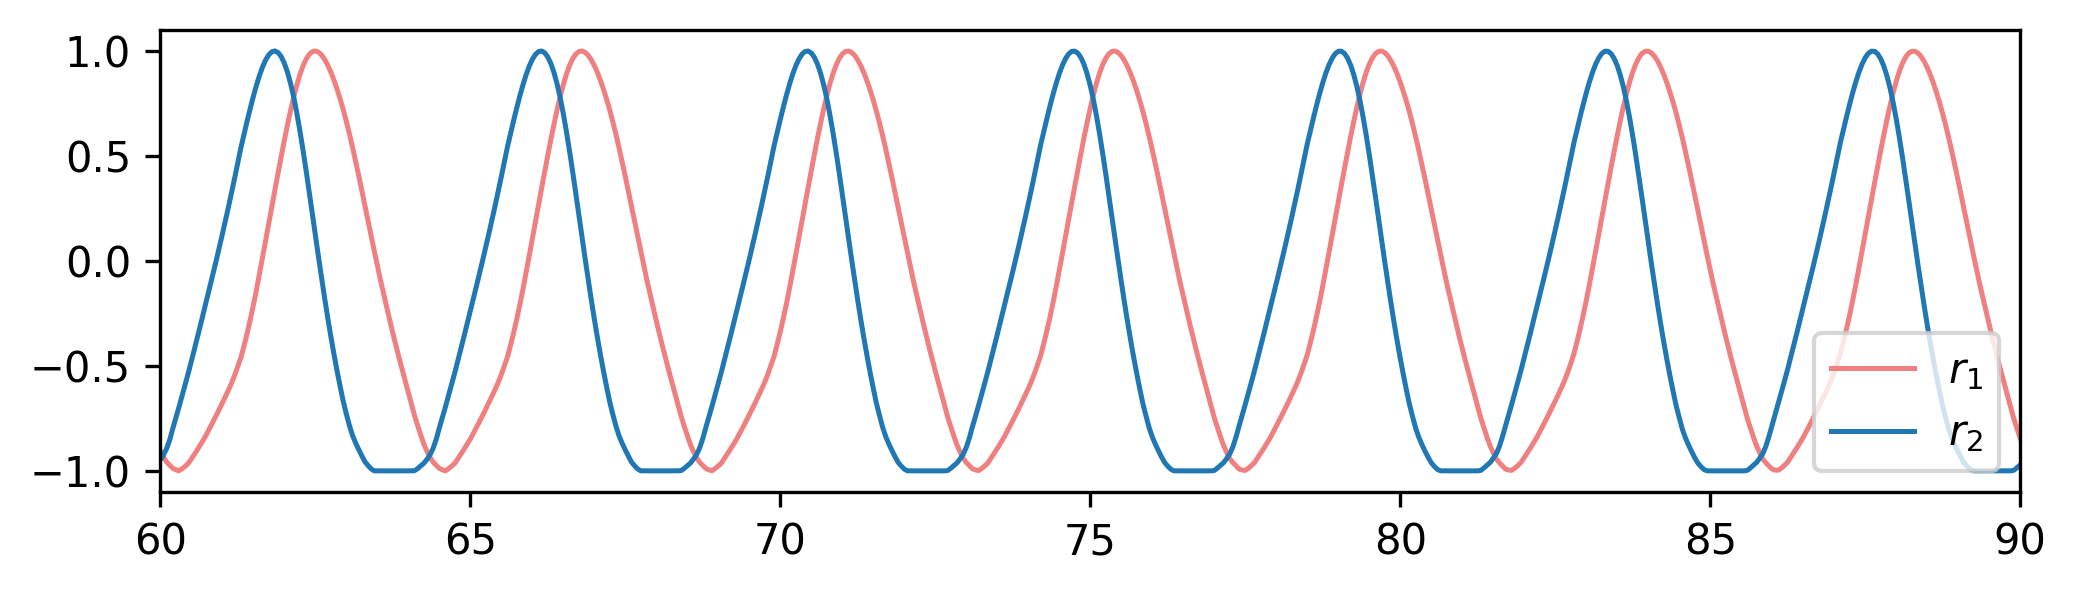

In [65]:
dt, t_0, t_end = 0.05, 0, 100
t_train = np.arange(t_0+dt, t_end-dt, dt)
t_train_span = (t_train[0], t_train[-1])

fig=plt.figure(dpi=300,figsize=(8,2))
plt.plot(t_train,x_train[:,0],label=r'$r_1$',lw=1.2,color='lightcoral')
plt.plot(t_train,x_train[:,1],label=r'$r_2$',lw=1.2)
plt.xlim([60,90])
plt.legend(loc='lower right')
plt.savefig(fname='Latent_space_SAE.png', dpi=300)
plt.show()

In [66]:
x0_train=x_train[0,:]
print(x0_train.shape)
print(x0_train.max(), x0_train.min())

(2,)
-0.8096278309822083 -0.9847120046615601


In [67]:
# Calculate time derivatives (dx/dt)
dxdt = np.array([np.gradient(x_train[:, i], dt) for i in range(x_train.shape[1])]).T
print(dxdt.shape)

(1998, 2)


In [68]:
degree_list = [7]   # Try multiple degrees
alpha_list = [3e-6]  # Try multiple alphas
#Without PCA Implementation alpha: degree=7, alpha=3e-06
#With PCA Implementation alpha: degree=6, alpha=7e-05
# 🚀 Outer loop: grid search
# 🚀 Initialize tracking:
best_derivative_error = np.inf
best_traj_error = np.inf
best_config = None

In [69]:
delta=1.0
max_iter=100
lasso_tol=1e-2
for degree in degree_list:
    for alpha in alpha_list:

        print(f"\n=== Testing degree={degree}, alpha={alpha} ===")
        # 1️⃣ Build Theta:
        matrix_theta = Theta(x_train, t_train, degree, True, False, False, False)

        # 2️⃣ Fit Adaptive Lasso:
        coefficients = np.zeros((matrix_theta.shape[1], x_train.shape[1]))
        for i in range(x_train.shape[1]):
            print(f"\nFitting variable {i} (degree={degree}, alpha={alpha})")
            coefficients[:, i] = alasso(matrix_theta, dxdt[:, i], alpha, delta, max_iter, lasso_tol)

        # 3️⃣ Compute derivative error (no integration yet!):
        xdot_sindy = matrix_theta @ coefficients

        derivative_error = np.linalg.norm(xdot_sindy - dxdt)
        relative_derivative_error = derivative_error / np.linalg.norm(dxdt)

        print(f"Derivative error = {derivative_error:.6e}")
        print(f"Relative derivative error = {relative_derivative_error:.6e}")

        dt = t_train[1] - t_train[0]
        x_manual = [x0_train]
        def f(x):
            theta_x = Theta(x.reshape(1, -1), np.array([0.0]), degree, True, False, False, False)
            return (theta_x @ coefficients).flatten()
        for t in t_train[:-1]:
            x_current = x_manual[-1]
            k1 = f(x_current)
            k2 = f(x_current + 0.5 * dt * k1)
            k3 = f(x_current + 0.5 * dt * k2)
            k4 = f(x_current + dt * k3)
            x_next = x_current + (dt / 6) * (k1 + 2*k2 + 2*k3 + k4)
            x_manual.append(x_next)
        x_latent_sindy = np.array(x_manual)

        # 5️⃣ Compute trajectory error:
        if x_latent_sindy.shape[0] != x_train.shape[0]:
            print(f"⚠️ WARNING: shape mismatch — skipping trajectory error.")
            print(f"Until now Best Trajectory error = {best_traj_error:.6e}")
        else:
            traj_error = np.linalg.norm(x_latent_sindy - x_train)
            relative_traj_error = traj_error / np.linalg.norm(x_train)

            print(f"Trajectory error = {traj_error:.6e}")
            print(f"Relative trajectory error = {relative_traj_error:.6e}")
            print(f"Best Trajectory error = {best_traj_error:.6e}")
            print(x_train.max(), x_train.min())
            # 6️⃣ Update best result:
            if relative_traj_error < best_traj_error:
                best_traj_error = relative_traj_error
                best_config = (degree, alpha)
                print(f"\n🚀 New BEST TRAJECTORY config found! degree={degree}, alpha={alpha}, relative_traj_error={relative_traj_error:.6e}")


=== Testing degree=7, alpha=3e-06 ===

Fitting variable 0 (degree=7, alpha=3e-06)

Iteration Weight Δ       Coef Δ         L1 Norm        Max Coef       Nonzero Coefs  
--------------------------------------------------------------------------------
0         7.716e+04      9.805e-01      6.018e+00      1.336e+00      64             
1         3.594e+15      7.727e+01      7.156e+00      1.309e+00      41             
2         1.094e+15      3.594e+07      7.660e+00      1.297e+00      34             
3         3.125e+14      4.688e+07      7.614e+00      1.304e+00      32             
4         1.562e+14      5.000e+07      7.718e+00      1.305e+00      31             
5         1.562e+14      5.156e+07      7.938e+00      1.297e+00      30             
6         4.909e-01      5.313e+07      8.161e+00      1.293e+00      30             
7         1.562e+14      5.313e+07      8.486e+00      1.283e+00      29             
8         4.314e+00      5.469e+07      7.449e+00      1.311e

In [70]:
# Final report:
print("\n=== GRID SEARCH COMPLETE ===")
print(f"✅ Best TRAJECTORY config: degree={best_config[0]}, alpha={best_config[1]}")
print(f"✅ Best trajectory error: {best_traj_error:.6e}")
print(f"\n=== Testing degree={degree}, alpha={alpha} ===")


=== GRID SEARCH COMPLETE ===
✅ Best TRAJECTORY config: degree=7, alpha=3e-06
✅ Best trajectory error: 1.436840e-02

=== Testing degree=7, alpha=3e-06 ===


In [71]:
if (len(degree_list)!=1):
    # 1️⃣ Build Theta:
    matrix_theta = Theta(x_train, t_train, best_config[0], True, False, False, False)
    # 2️⃣ Fit Adaptive Lasso:
    coefficients = np.zeros((matrix_theta.shape[1], x_train.shape[1]))
    for i in range(x_train.shape[1]):
         print(f"\nFitting variable {i} (degree={best_config[0]}, alpha={best_config[1]})")
         coefficients[:, i] = alasso(matrix_theta, dxdt[:, i], best_config[1], delta, max_iter, lasso_tol)
    # 3️⃣ Compute derivative error (no integration yet!):
    xdot_sindy = matrix_theta @ coefficients
    derivative_error = np.linalg.norm(xdot_sindy - dxdt)
    relative_derivative_error = derivative_error / np.linalg.norm(dxdt)
    print(f"Derivative error = {derivative_error:.6e}")
    print(f"Relative derivative error = {relative_derivative_error:.6e}")

    dt = t_train[1] - t_train[0]
    x_manual = [x0_train]
    def f(x):
        theta_x = Theta(x.reshape(1, -1), np.array([0.0]), best_config[0], True, False, False, False)
        return (theta_x @ coefficients).flatten()
    for t in t_train[:-1]:
        x_current = x_manual[-1]
        k1 = f(x_current)
        k2 = f(x_current + 0.5 * dt * k1)
        k3 = f(x_current + 0.5 * dt * k2)
        k4 = f(x_current + dt * k3)
        x_next = x_current + (dt / 6) * (k1 + 2*k2 + 2*k3 + k4)
        x_manual.append(x_next)
    x_latent_sindy = np.array(x_manual)

    # Compute trajectory error:
    if x_latent_sindy.shape[0] != x_train.shape[0]:
        print(f"⚠️ WARNING: shape mismatch — skipping trajectory error.")
    else:
        traj_error = np.linalg.norm(x_latent_sindy - x_train)
        relative_traj_error = traj_error / np.linalg.norm(x_train)
        print(f"Trajectory error = {traj_error:.6e}")
        print(f"Relative trajectory error = {relative_traj_error:.6e}")

In [72]:
re_r1=x_latent_sindy
for i in range(len(re_r1)):
  re_r1[i,:] = (re_r1[i,:]*(r_max11-r_min11)+r_max11+r_min11)/2

In [73]:
n_ts, N, k = 2000, 8192*2, 2
X = np.zeros((n_ts,N))
X[:,:] = np.hstack([Un,Vn])#Un[-n_ts:,:]
X_avg = np.mean(X,axis=0)
Xrall = np.zeros((n_ts,N))
for i in range(0,n_ts):
  Xrall[i,:] = X[i,:]-X_avg
Xrall_sae = cp(Xrall)
X0_sae = cp(Xrall_sae)
min = np.min(X0_sae,axis=0)
max = np.max(X0_sae,axis=0)
X0_sae = X0_sae-min
X0_sae=X0_sae.reshape((X0_sae.shape[0],-1))

In [74]:
decoded_data = decoder_sae.predict(re_r1)

63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step


In [75]:
Ux_reconstructed = np.zeros_like(decoded_data)
Ux_reconstructed = decoded_data+ X_avg + min 
Ux_reconstructed=Ux_reconstructed.reshape(n_ts-2,N)
Ux_data=cp(X)
Ux_true = Ux_data[1:2000-1,:].reshape(1998,-1) 
full_space_error = np.linalg.norm(Ux_reconstructed - Ux_true)
relative_full_space_error = 1-full_space_error / np.linalg.norm(Ux_true)
print(full_space_error)
print(relative_full_space_error)

39.530576636598866
0.9908387430680868


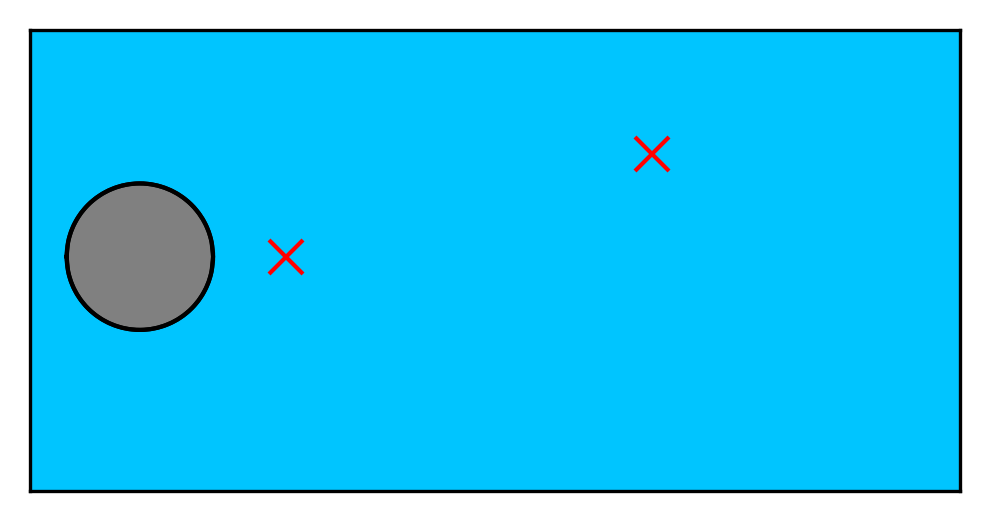

In [76]:
idx = 5486
Nx, Ny = 128, 64  # assuming these are your original grid sizes
idx1 = 5486
idx2 = 2272
idx1, idy1 = idx1//Ny, idx1%Ny
idx2, idy2 = idx2//Ny, idx2%Ny
x1, y1 = Xn[idx1], Yn[idy1]
x2, y2 = Xn[idx2], Yn[idy2]
contour((Ux_true).reshape(1998,2,128,64)[100,0,:,:]*0,'jet',[-0.8,1.7],Xn,Yn,markers=[(x1,y1),(x2,y2)])

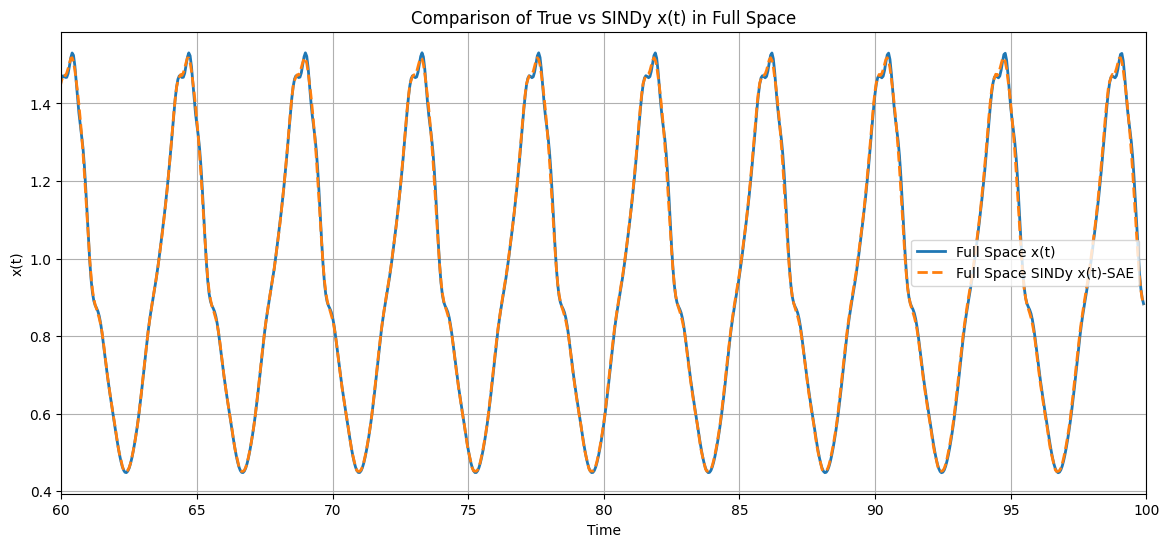

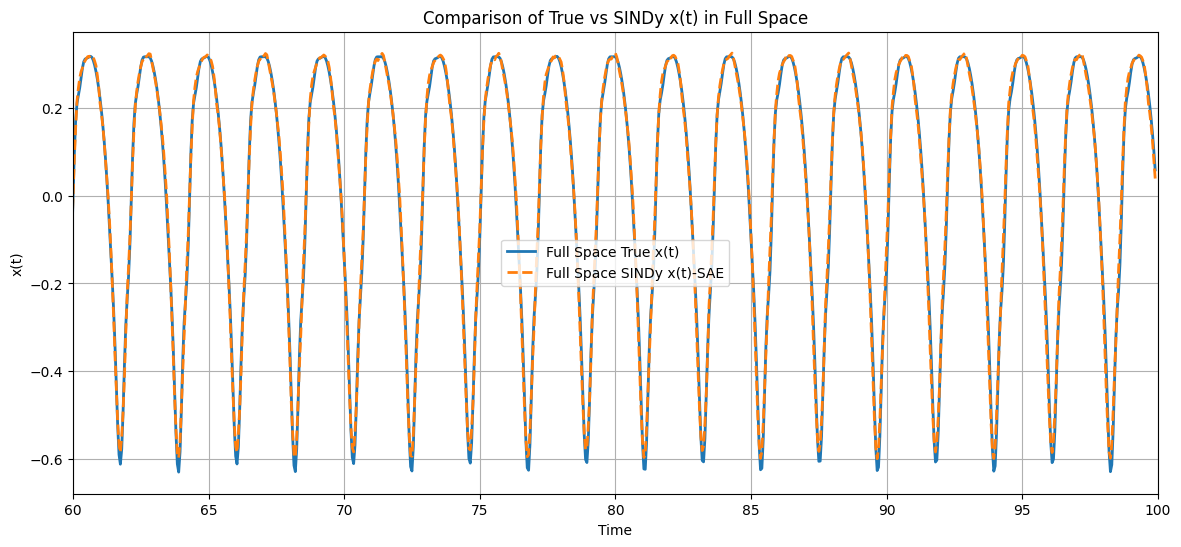

(1998, 2) (1998, 2) (1998,)


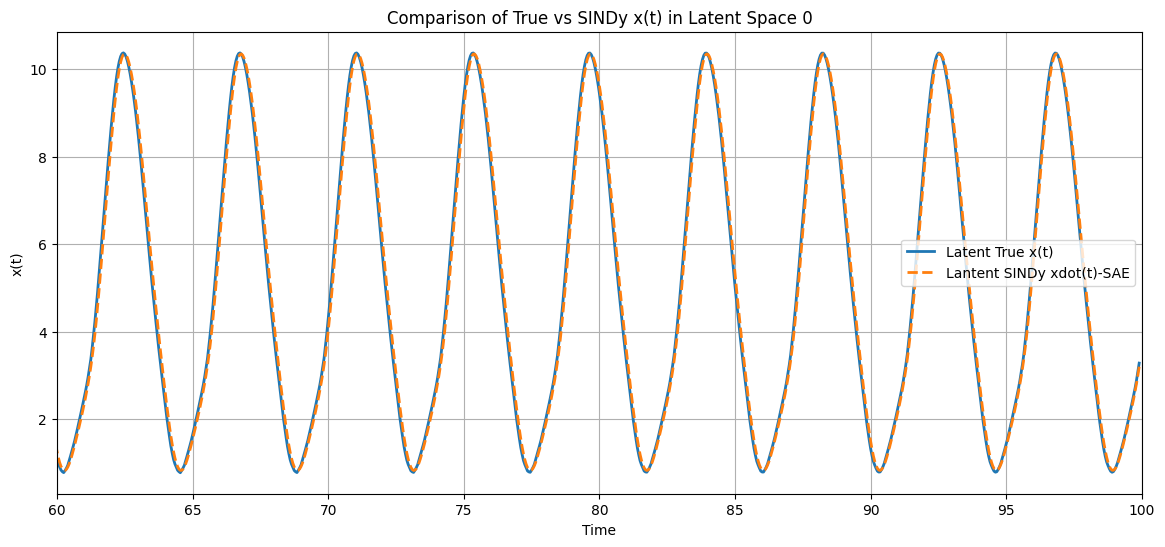

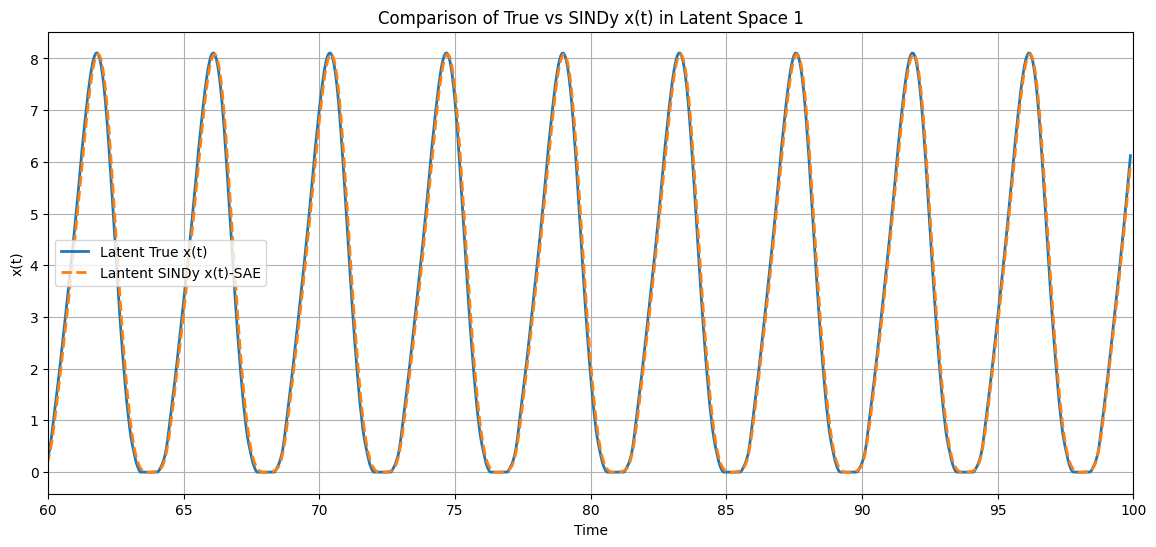

In [77]:
plt.figure(figsize=(14, 6))
plt.plot(t_train, Ux_true[:, 5486], label='Full Space x(t)', linewidth=2)
plt.plot(t_train, Ux_reconstructed[:, 5486], '--', label='Full Space SINDy x(t)-SAE', linewidth=2)
plt.xlabel('Time')
plt.xlim(60,100)
plt.ylabel(f'x(t)')
plt.title(f'Comparison of True vs SINDy x(t) in Full Space')
plt.legend()
plt.grid(True)
plt.savefig(fname='Comparison of True vs SINDy x(t) in Full Space 1-SAE', dpi=300, bbox_inches='tight')
plt.show()


plt.figure(figsize=(14, 6))
plt.plot(t_train, Ux_true[:, 2272], label='Full Space True x(t)', linewidth=2)
plt.plot(t_train, Ux_reconstructed[:, 2272], '--', label='Full Space SINDy x(t)-SAE', linewidth=2)
plt.xlabel('Time')
plt.xlim(60,100)
plt.ylabel(f'x(t)')
plt.title(f'Comparison of True vs SINDy x(t) in Full Space')
plt.legend()
plt.grid(True)
plt.savefig(fname='Comparison of True vs SINDy x(t) in Full Space 2-SAE', dpi=300, bbox_inches='tight')
plt.show()

x_train = np.load('models/latent_stacked_auto_encoder'+'.npy')[-1998:,:]
#x_train=scaler.fit_transform(x_train)
print(x_train.shape, x_latent_sindy.shape, t_train.shape)
plt.figure(figsize=(14, 6))
plt.plot(t_train, x_train[:, 0], label='Latent True x(t)', linewidth=2)
plt.plot(t_train, x_latent_sindy[:, 0], '--', label='Lantent SINDy xdot(t)-SAE', linewidth=2)
plt.xlabel('Time')
plt.xlim(60,100)
plt.ylabel(f'x(t)')
plt.title(f'Comparison of True vs SINDy x(t) in Latent Space 0')
plt.legend()
plt.grid(True)
plt.savefig(fname='Comparison of True vs SINDy x(t) in Latent Space 1-SAE', dpi=300, bbox_inches='tight')
plt.show()


plt.figure(figsize=(14, 6))
plt.plot(t_train, x_train[:, 1], label='Latent True x(t)', linewidth=2)
plt.plot(t_train, x_latent_sindy[:, 1], '--', label='Lantent SINDy x(t)-SAE', linewidth=2)
plt.xlabel('Time')
plt.xlim(60,100)
plt.ylabel(f'x(t)')
plt.title(f'Comparison of True vs SINDy x(t) in Latent Space 1')
plt.legend()
plt.grid(True)
plt.savefig(fname='Comparison of True vs SINDy x(t) in Latent Space 2-SAE', dpi=300, bbox_inches='tight')
plt.show()


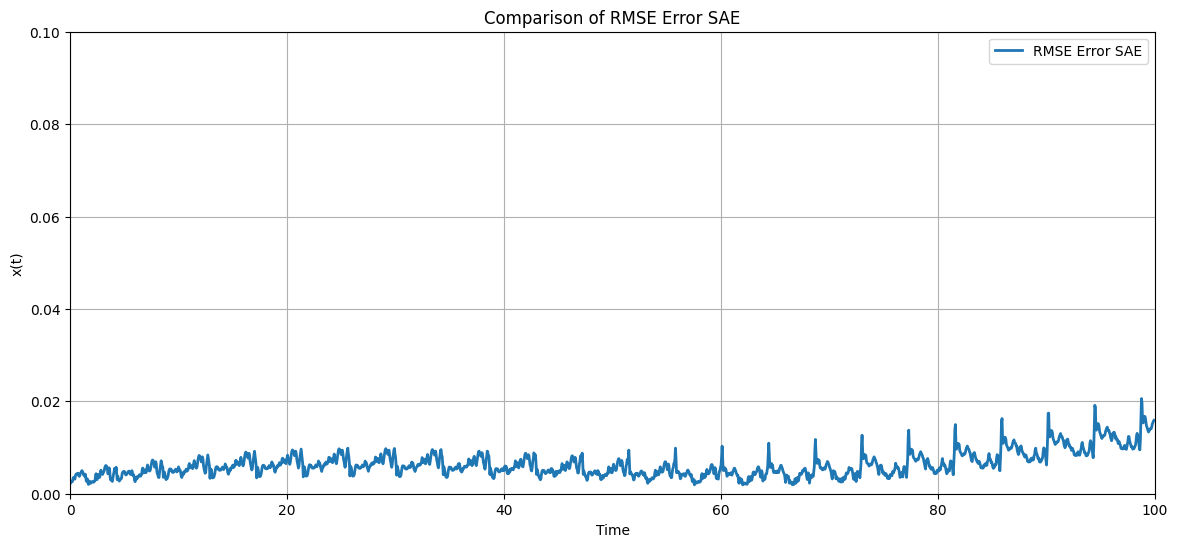

In [78]:
rmse_sae = np.zeros((len(Ux_true),))
rmse_sae_pod = np.zeros((len(Ux_true),))
for i in range(len(Ux_true)):
  rmse_sae[i] = np.sqrt(((Ux_true[i,:]-Ux_reconstructed[i,:]) ** 2).mean())

plt.figure(figsize=(14, 6))
plt.plot(t_train,rmse_sae, label='RMSE Error SAE', linewidth=2)
plt.xlabel('Time')
plt.xlim(0,100)
plt.ylim(0,0.1)
plt.ylabel(f'x(t)')
plt.title(f'Comparison of RMSE Error SAE')
plt.legend()
plt.grid(True)
plt.savefig(fname='Comparison of RMSE Error SAE', dpi=300, bbox_inches='tight')
plt.show()

In [79]:

print(Ux_reconstructed.shape)
Ux_reconstructed=Ux_reconstructed.reshape(1998,2,128,64)
Ux_true=Ux_true.reshape(1998,2,128,64)


(1998, 16384)


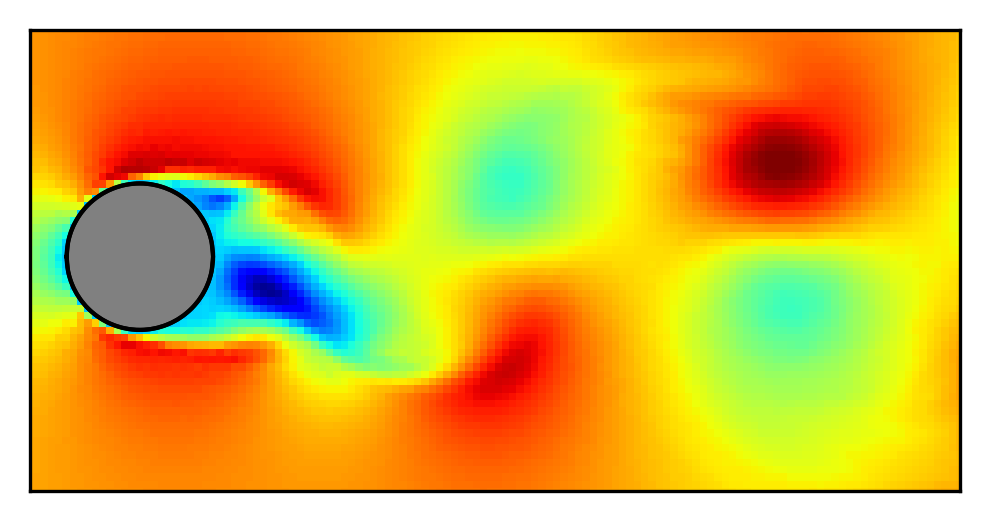

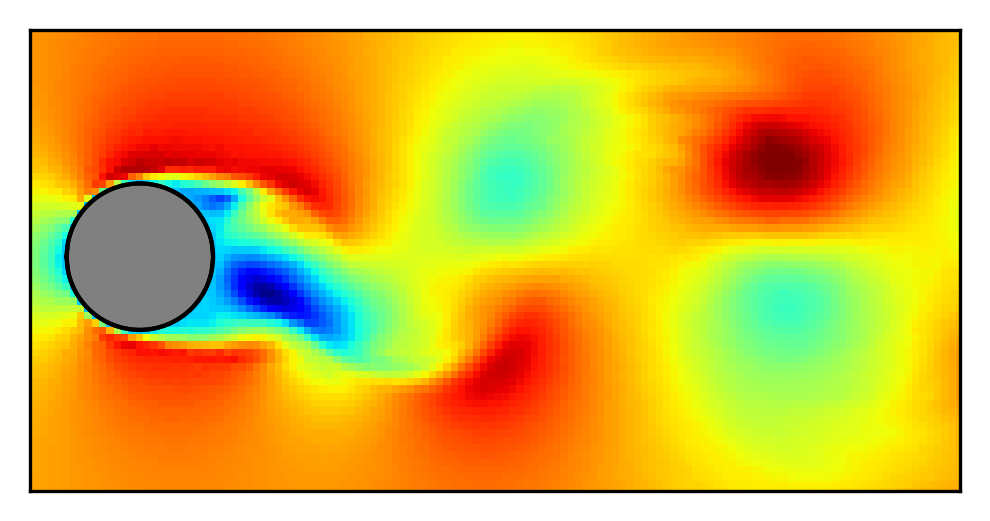

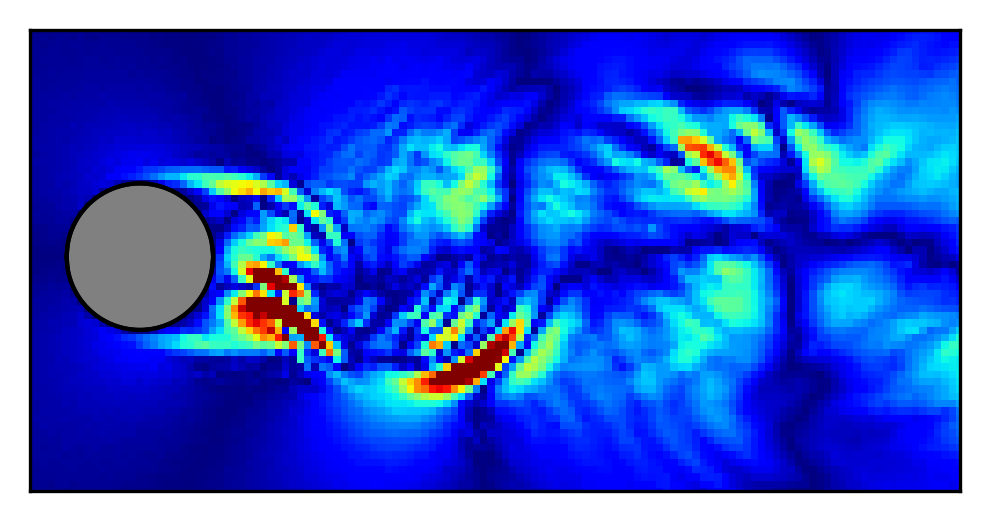

In [80]:
#Comparison of Contrours of Uy velocity at last timestep
t=1997 #98.5 s
contour(Ux_reconstructed[t,0,:,:],'jet',[-0.8,1.7],Xn,Yn)
contour(Ux_true[t,0,:,:],'jet',[-0.8,1.7],Xn,Yn)
contour(abs(Ux_true[t,0,:,:]-Ux_reconstructed[t,0,:,:]),'jet',[0, 0.05],Xn,Yn)


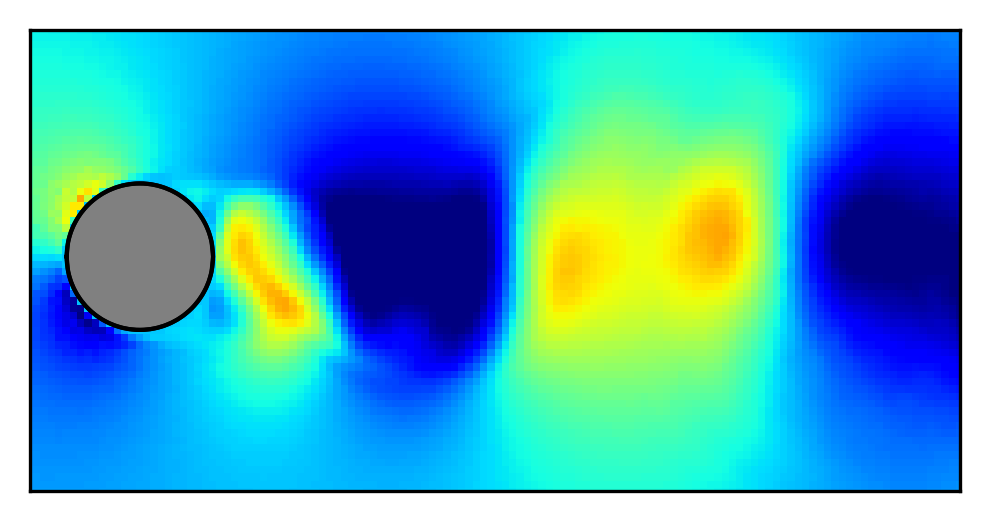

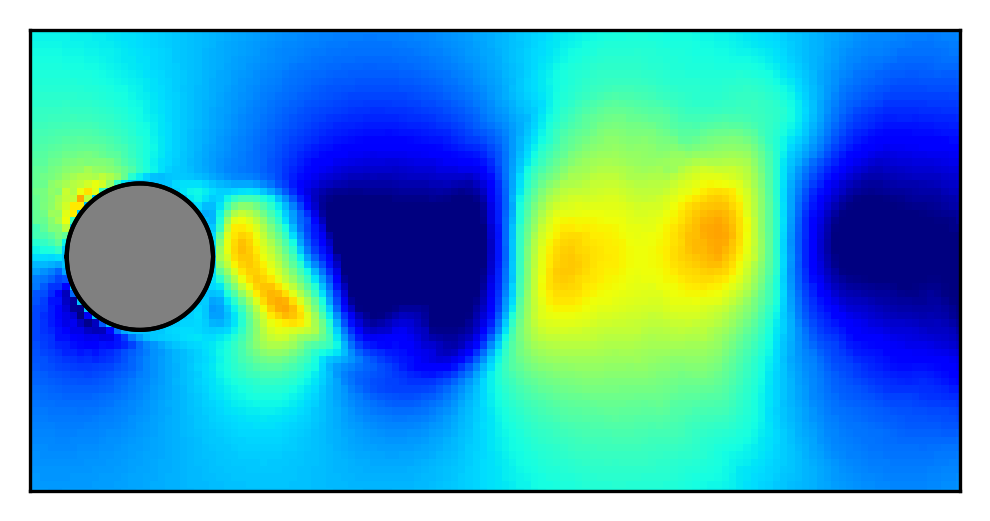

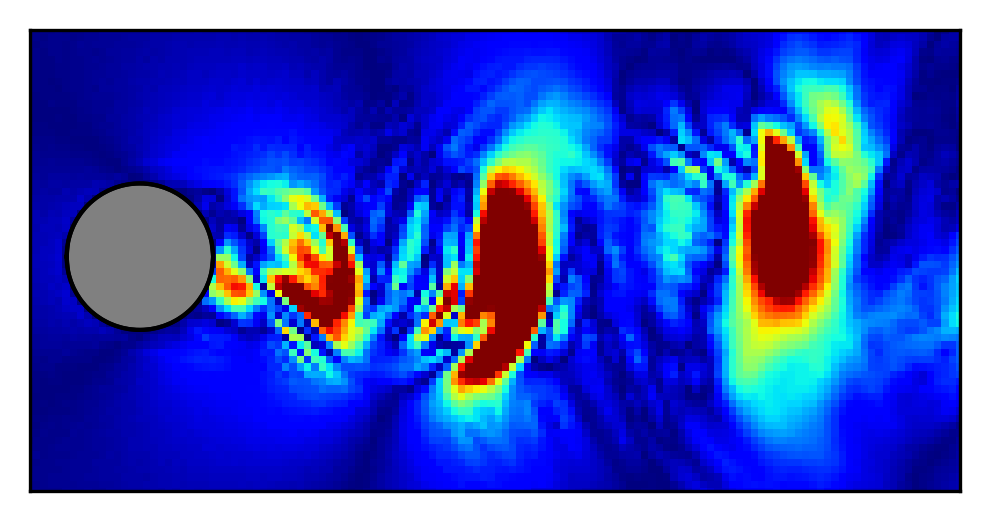

In [81]:
#Comparison of Contrours of Uy velocity at last timestep
t=1997 #98.5 s
contour(Ux_reconstructed[t,1,:,:],'jet',[-0.8,1.7],Xn,Yn)
contour(Ux_true[t,1,:,:],'jet',[-0.8,1.7],Xn,Yn)
contour(abs(Ux_true[t,1,:,:]-Ux_reconstructed[t,1,:,:]),'jet',[0, 0.05],Xn,Yn)

## WITH PCA IMPLEMENTATION

In [82]:
x_train = np.load('models/latent_stacked_auto_encoder'+'.npy')

In [83]:
#x_train2=cp(x_train)
r=cp(x_train)
Xor = cp(r)
r_min11 = np.min(Xor,axis=0)
r_max11 = np.max(Xor,axis=0)
for i in range(len(Xor)):
  Xor[i,:] = (2*Xor[i,:]-r_max11-r_min11)/(r_max11-r_min11)
for i in range(len(Xor)):
  for j in range(2):
    if np.isnan(Xor[i,j]):
      print(i,j)
print(Xor.shape)
print(Xor.max(),Xor.min())


(2000, 2)
1.0 -1.0


In [84]:
sae_pca = PCA(n_components=2)
Xor2 = sae_pca.fit_transform(Xor)
print(Xor2.shape)
re_Xor = sae_pca.inverse_transform(Xor2)
print(1-np.linalg.norm(re_Xor-Xor)/np.linalg.norm(Xor))
r_min12 = np.min(Xor2,axis=0)
r_max12 = np.max(Xor2,axis=0)
for i in range(len(Xor2)):
  Xor2[i,:] = (2*Xor2[i,:]-r_max12-r_min12)/(r_max12-r_min12)
for i in range(len(Xor2)):
  for j in range(2):
    if np.isnan(Xor2[i,j]):
      print(i,j)
print(Xor2.shape)
print(Xor2.max(),Xor2.min())      


(2000, 2)
0.99999994
(2000, 2)
1.0 -1.0


In [85]:
dt = 0.05
r1 = cp(Xor2[:,0])
r2 = cp(Xor2[:,1])
print(r1.shape,)
data = np.zeros([len(r1)-2,2])
data[:,0] = r1[1:len(r1)-1]
data[:,1] = r2[1:len(r2)-1]           
x_train=cp(data)
print(x_train.max(), x_train.min())

(2000,)
1.0 -1.0


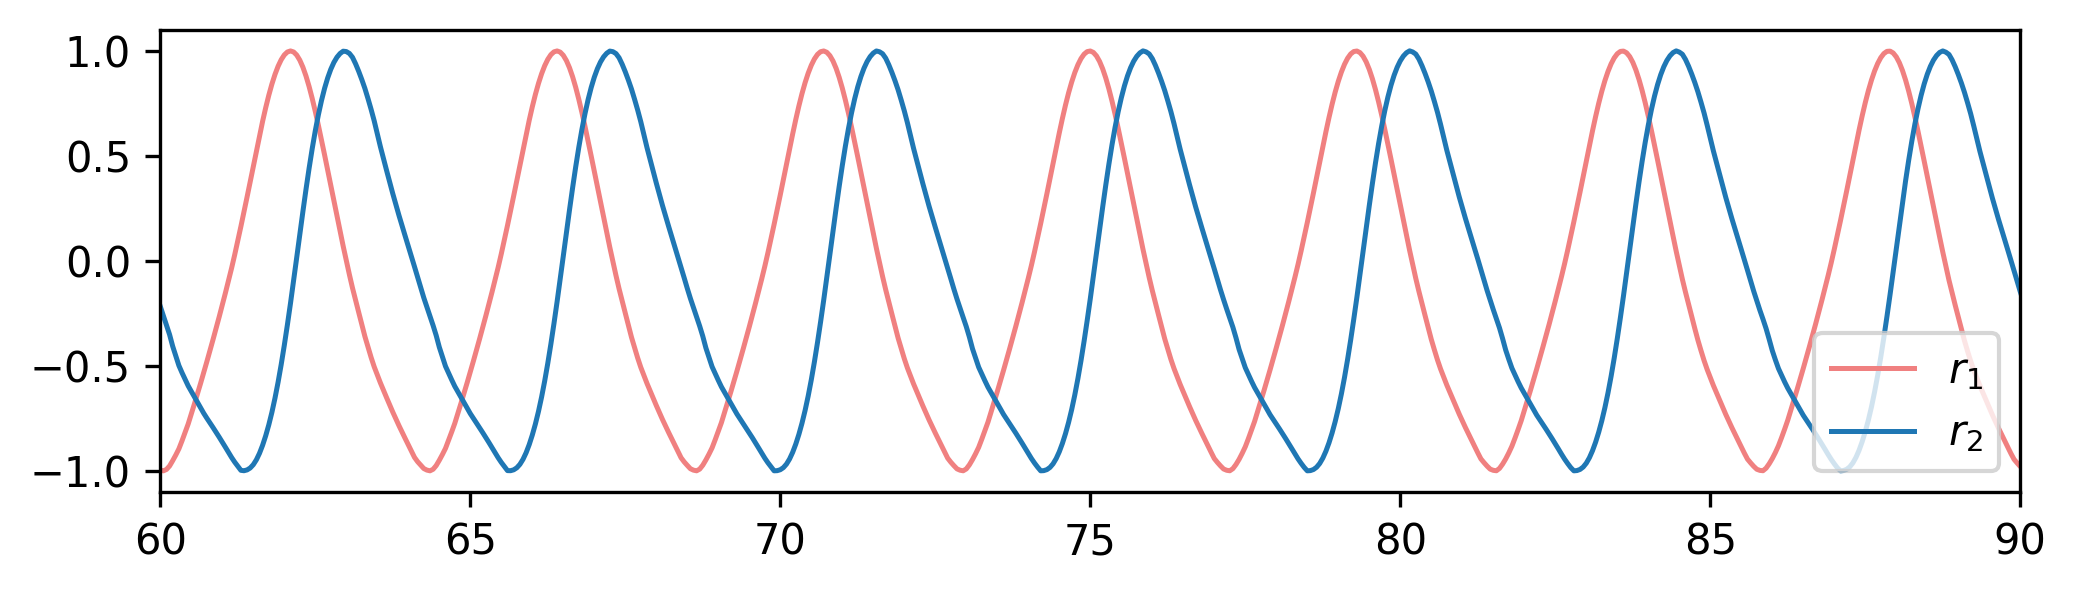

In [86]:
dt, t_0, t_end = 0.05, 0, 100
t_train = np.arange(t_0+dt, t_end-dt, dt)
t_train_span = (t_train[0], t_train[-1])

fig=plt.figure(dpi=300,figsize=(8,2))
plt.plot(t_train,x_train[:,0],label=r'$r_1$',lw=1.2,color='lightcoral')
plt.plot(t_train,x_train[:,1],label=r'$r_2$',lw=1.2)
plt.xlim([60,90])
plt.legend(loc='lower right')
plt.savefig(fname='Latent_space_SAE+POD.png', dpi=300)
plt.show()

In [87]:
x0_train=x_train[0,:]
print(x0_train.shape)
print(x0_train.max(), x0_train.min())

(2,)
-0.3973136842250824 -0.9559053182601929


In [88]:
# Calculate time derivatives (dx/dt)
dxdt = np.array([np.gradient(x_train[:, i], dt) for i in range(x_train.shape[1])]).T
print(dxdt.shape)

(1998, 2)


In [89]:
degree_list = [6]   # Try multiple degrees
alpha_list = [7e-5]  # Try multiple alphas
#Without PCA Implementation alpha: degree=7, alpha=3e-06
#With PCA Implementation alpha: degree=6, alpha=7e-05
# 🚀 Outer loop: grid search
# 🚀 Initialize tracking:
best_derivative_error = np.inf
best_traj_error = np.inf
best_config = None


In [90]:
delta=1.0
max_iter=100
lasso_tol=1e-2
for degree in degree_list:
    for alpha in alpha_list:

        print(f"\n=== Testing degree={degree}, alpha={alpha} ===")
        # 1️⃣ Build Theta:
        matrix_theta = Theta(x_train, t_train, degree, True, False, False, False)

        # 2️⃣ Fit Adaptive Lasso:
        coefficients = np.zeros((matrix_theta.shape[1], x_train.shape[1]))
        for i in range(x_train.shape[1]):
            print(f"\nFitting variable {i} (degree={degree}, alpha={alpha})")
            coefficients[:, i] = alasso(matrix_theta, dxdt[:, i], alpha, delta, max_iter, lasso_tol)

        # 3️⃣ Compute derivative error (no integration yet!):
        xdot_sindy = matrix_theta @ coefficients

        derivative_error = np.linalg.norm(xdot_sindy - dxdt)
        relative_derivative_error = derivative_error / np.linalg.norm(dxdt)

        print(f"Derivative error = {derivative_error:.6e}")
        print(f"Relative derivative error = {relative_derivative_error:.6e}")

        dt = t_train[1] - t_train[0]
        x_manual = [x0_train]
        def f(x):
            theta_x = Theta(x.reshape(1, -1), np.array([0.0]), degree, True, False, False, False)
            return (theta_x @ coefficients).flatten()
        for t in t_train[:-1]:
            x_current = x_manual[-1]
            k1 = f(x_current)
            k2 = f(x_current + 0.5 * dt * k1)
            k3 = f(x_current + 0.5 * dt * k2)
            k4 = f(x_current + dt * k3)
            x_next = x_current + (dt / 6) * (k1 + 2*k2 + 2*k3 + k4)
            x_manual.append(x_next)
        x_latent_sindy = np.array(x_manual)

        # 5️⃣ Compute trajectory error:
        if x_latent_sindy.shape[0] != x_train.shape[0]:
            print(f"⚠️ WARNING: shape mismatch — skipping trajectory error.")
            print(f"Until now Best Trajectory error = {best_traj_error:.6e}")
        else:
            traj_error = np.linalg.norm(x_latent_sindy - x_train)
            relative_traj_error = traj_error / np.linalg.norm(x_train)

            print(f"Trajectory error = {traj_error:.6e}")
            print(f"Relative trajectory error = {relative_traj_error:.6e}")
            print(f"Best Trajectory error = {best_traj_error:.6e}")
            print(x_train.max(), x_train.min())
            # 6️⃣ Update best result:
            if relative_traj_error < best_traj_error:
                best_traj_error = relative_traj_error
                best_config = (degree, alpha)
                print(f"\n🚀 New BEST TRAJECTORY config found! degree={degree}, alpha={alpha}, relative_traj_error={relative_traj_error:.6e}")


=== Testing degree=6, alpha=7e-05 ===

Fitting variable 0 (degree=6, alpha=7e-05)

Iteration Weight Δ       Coef Δ         L1 Norm        Max Coef       Nonzero Coefs  
--------------------------------------------------------------------------------
0         3.469e+15      1.057e+00      5.734e+00      1.364e+00      32             
1         3.265e+15      3.469e+07      4.706e+00      1.346e+00      16             
2         1.020e+15      6.735e+07      4.679e+00      1.339e+00      11             
3         2.041e+14      7.755e+07      4.601e+00      1.335e+00      10             
4         3.064e-03      7.959e+07      4.598e+00      1.334e+00      10             
5         1.779e-03      7.959e+07      4.599e+00      1.334e+00      10             
6         1.346e-03      7.959e+07      4.600e+00      1.334e+00      10             
7         2.291e-03      7.959e+07      4.605e+00      1.333e+00      10             
8         2.208e-03      7.959e+07      4.607e+00      1.333e

In [91]:
# Final report:
print("\n=== GRID SEARCH COMPLETE ===")
print(f"✅ Best TRAJECTORY config: degree={best_config[0]}, alpha={best_config[1]}")
print(f"✅ Best trajectory error: {best_traj_error:.6e}")
print(f"\n=== Testing degree={degree}, alpha={alpha} ===")


=== GRID SEARCH COMPLETE ===
✅ Best TRAJECTORY config: degree=6, alpha=7e-05
✅ Best trajectory error: 1.101526e-02

=== Testing degree=6, alpha=7e-05 ===


In [92]:
if (len(degree_list)!=1):
    # 1️⃣ Build Theta:
    matrix_theta = Theta(x_train, t_train, best_config[0], True, False, False, False)
    # 2️⃣ Fit Adaptive Lasso:
    coefficients = np.zeros((matrix_theta.shape[1], x_train.shape[1]))
    for i in range(x_train.shape[1]):
         print(f"\nFitting variable {i} (degree={best_config[0]}, alpha={best_config[1]})")
         coefficients[:, i] = alasso(matrix_theta, dxdt[:, i], best_config[1], delta, max_iter, lasso_tol)
    # 3️⃣ Compute derivative error (no integration yet!):
    xdot_sindy = matrix_theta @ coefficients
    derivative_error = np.linalg.norm(xdot_sindy - dxdt)
    relative_derivative_error = derivative_error / np.linalg.norm(dxdt)
    print(f"Derivative error = {derivative_error:.6e}")
    print(f"Relative derivative error = {relative_derivative_error:.6e}")

    dt = t_train[1] - t_train[0]
    x_manual = [x0_train]
    def f(x):
        theta_x = Theta(x.reshape(1, -1), np.array([0.0]), best_config[0], True, False, False, False)
        return (theta_x @ coefficients).flatten()
    for t in t_train[:-1]:
        x_current = x_manual[-1]
        k1 = f(x_current)
        k2 = f(x_current + 0.5 * dt * k1)
        k3 = f(x_current + 0.5 * dt * k2)
        k4 = f(x_current + dt * k3)
        x_next = x_current + (dt / 6) * (k1 + 2*k2 + 2*k3 + k4)
        x_manual.append(x_next)
    x_latent_sindy = np.array(x_manual)

    # Compute trajectory error:
    if x_latent_sindy.shape[0] != x_train.shape[0]:
        print(f"⚠️ WARNING: shape mismatch — skipping trajectory error.")
    else:
        traj_error = np.linalg.norm(x_latent_sindy - x_train)
        relative_traj_error = traj_error / np.linalg.norm(x_train)
        print(f"Trajectory error = {traj_error:.6e}")
        print(f"Relative trajectory error = {relative_traj_error:.6e}")

In [93]:
re_r1=x_latent_sindy
for i in range(len(re_r1)):
  re_r1[i,:] = (re_r1[i,:]*(r_max12-r_min12)+r_max12+r_min12)/2
re_r2= sae_pca.inverse_transform(re_r1)
for i in range(len(re_r1)):
  re_r1[i,:] = (re_r2[i,:]*(r_max11-r_min11)+r_max11+r_min11)/2

In [94]:
n_ts, N, k = 2000, 8192*2, 2
X = np.zeros((n_ts,N))
X[:,:] = np.hstack([Un,Vn])#Un[-n_ts:,:]
X_avg = np.mean(X,axis=0)
Xrall = np.zeros((n_ts,N))
for i in range(0,n_ts):
  Xrall[i,:] = X[i,:]-X_avg
Xrall_sae = cp(Xrall)
X0_sae = cp(Xrall_sae)
min = np.min(X0_sae,axis=0)
max = np.max(X0_sae,axis=0)
X0_sae = X0_sae-min
X0_sae=X0_sae.reshape((X0_sae.shape[0],-1))

In [95]:
decoded_data = decoder_sae.predict(re_r1)

63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step


In [96]:
Ux_reconstructed = np.zeros_like(decoded_data)
Ux_reconstructed = decoded_data+ X_avg + min 
Ux_reconstructed=Ux_reconstructed.reshape(n_ts-2,N)
Ux_data=cp(X)
Ux_true = Ux_data[1:2000-1,:].reshape(1998,-1) 
full_space_error = np.linalg.norm(Ux_reconstructed - Ux_true)
relative_full_space_error = 1-full_space_error / np.linalg.norm(Ux_true)
print(full_space_error)
print(relative_full_space_error)

31.626487679161507
0.9926705248409017


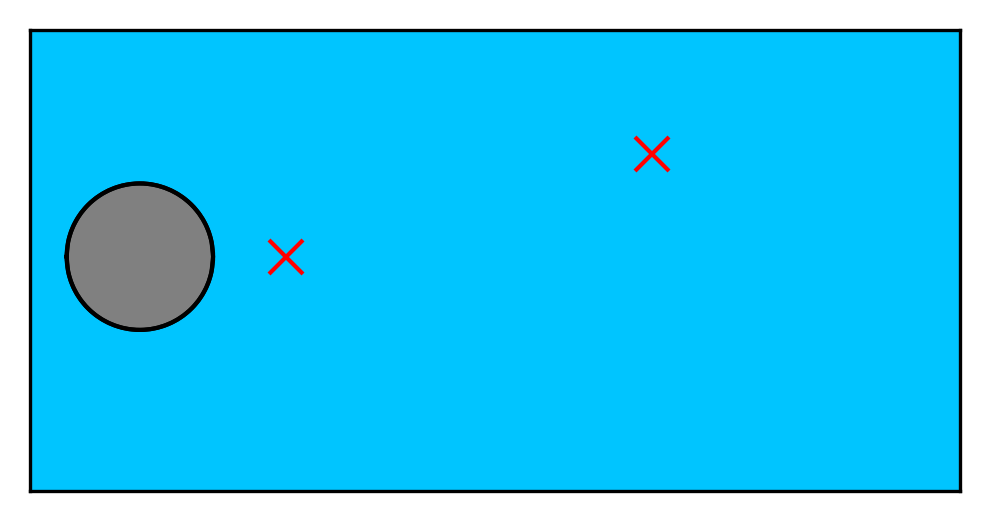

In [97]:
idx = 5486
Nx, Ny = 128, 64  # assuming these are your original grid sizes
idx1 = 5486
idx2 = 2272
idx1, idy1 = idx1//Ny, idx1%Ny
idx2, idy2 = idx2//Ny, idx2%Ny
x1, y1 = Xn[idx1], Yn[idy1]
x2, y2 = Xn[idx2], Yn[idy2]
contour((Ux_true).reshape(1998,2,128,64)[100,0,:,:]*0,'jet',[-0.8,1.7],Xn,Yn,markers=[(x1,y1),(x2,y2)])

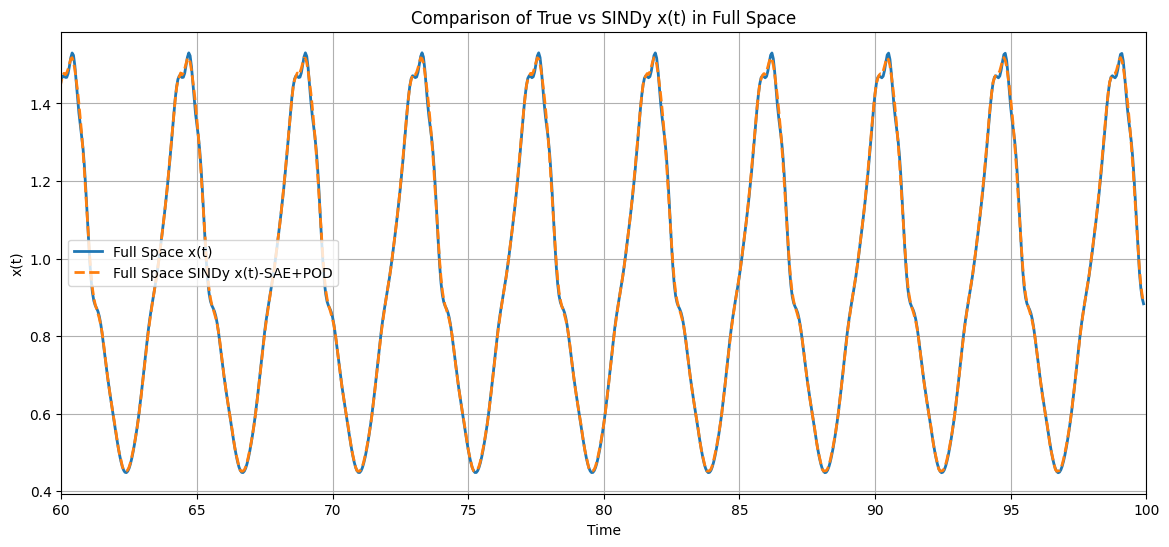

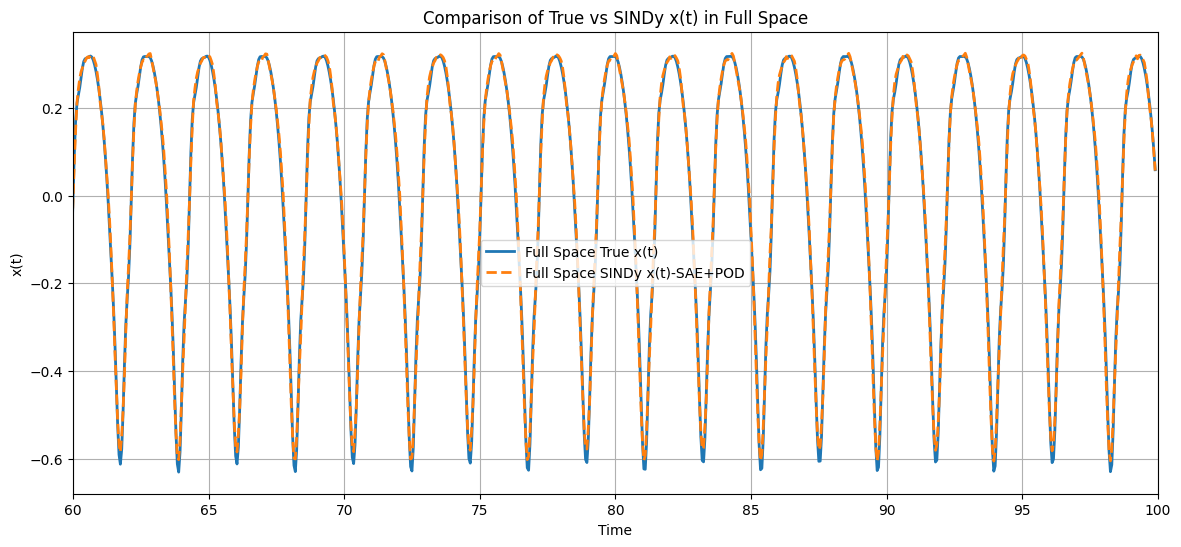

(1998, 2) (1998, 2) (1998,)


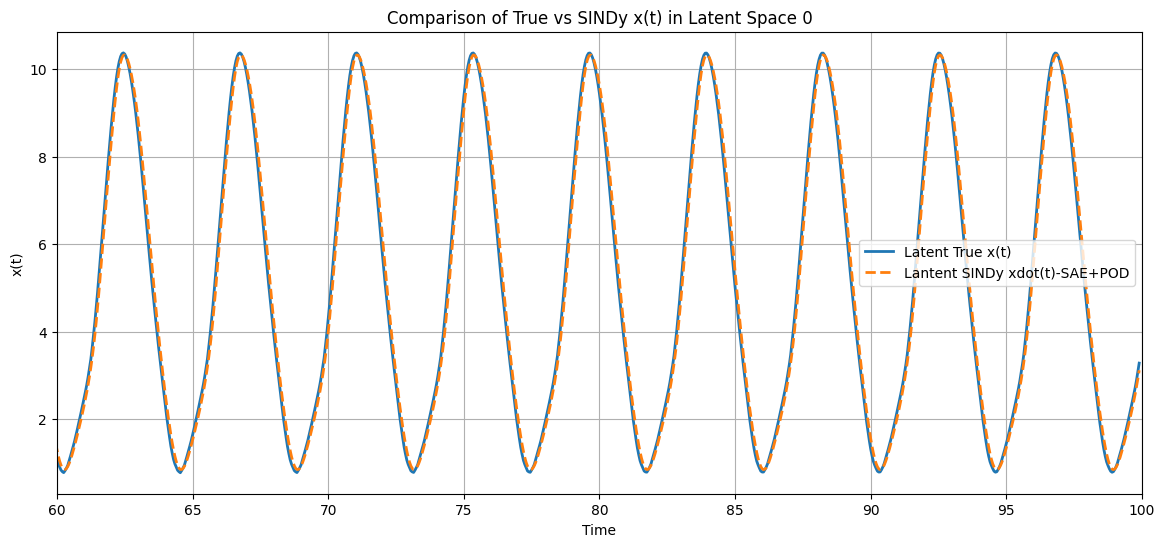

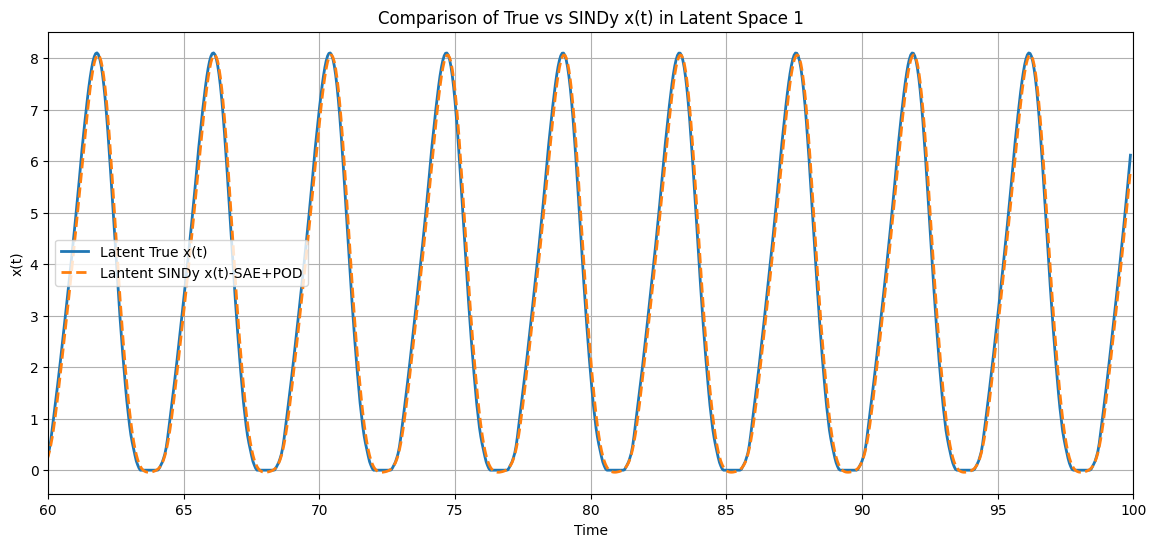

In [98]:
plt.figure(figsize=(14, 6))
plt.plot(t_train, Ux_true[:, 5486], label='Full Space x(t)', linewidth=2)
plt.plot(t_train, Ux_reconstructed[:, 5486], '--', label='Full Space SINDy x(t)-SAE+POD', linewidth=2)
plt.xlabel('Time')
plt.xlim(60,100)
plt.ylabel(f'x(t)')
plt.title(f'Comparison of True vs SINDy x(t) in Full Space')
plt.legend()
plt.grid(True)
plt.savefig(fname='Comparison of True vs SINDy x(t) in Full Space 1-SAE+POD', dpi=300, bbox_inches='tight')
plt.show()


plt.figure(figsize=(14, 6))
plt.plot(t_train, Ux_true[:, 2272], label='Full Space True x(t)', linewidth=2)
plt.plot(t_train, Ux_reconstructed[:, 2272], '--', label='Full Space SINDy x(t)-SAE+POD', linewidth=2)
plt.xlabel('Time')
plt.xlim(60,100)
plt.ylabel(f'x(t)')
plt.title(f'Comparison of True vs SINDy x(t) in Full Space')
plt.legend()
plt.grid(True)
plt.savefig(fname='Comparison of True vs SINDy x(t) in Full Space 2-SAE+POD', dpi=300, bbox_inches='tight')
plt.show()

x_train = np.load('models/latent_stacked_auto_encoder'+'.npy')[-1998:,:]
#x_train=scaler.fit_transform(x_train)
print(x_train.shape, x_latent_sindy.shape, t_train.shape)
plt.figure(figsize=(14, 6))
plt.plot(t_train, x_train[:, 0], label='Latent True x(t)', linewidth=2)
plt.plot(t_train, x_latent_sindy[:, 0], '--', label='Lantent SINDy xdot(t)-SAE+POD', linewidth=2)
plt.xlabel('Time')
plt.xlim(60,100)
plt.ylabel(f'x(t)')
plt.title(f'Comparison of True vs SINDy x(t) in Latent Space 0')
plt.legend()
plt.grid(True)
plt.savefig(fname='Comparison of True vs SINDy x(t) in Latent Space 1-SAE+POD', dpi=300, bbox_inches='tight')
plt.show()


plt.figure(figsize=(14, 6))
plt.plot(t_train, x_train[:, 1], label='Latent True x(t)', linewidth=2)
plt.plot(t_train, x_latent_sindy[:, 1], '--', label='Lantent SINDy x(t)-SAE+POD', linewidth=2)
plt.xlabel('Time')
plt.xlim(60,100)
plt.ylabel(f'x(t)')
plt.title(f'Comparison of True vs SINDy x(t) in Latent Space 1')
plt.legend()
plt.grid(True)
plt.savefig(fname='Comparison of True vs SINDy x(t) in Latent Space 2-SAE+POD', dpi=300, bbox_inches='tight')
plt.show()


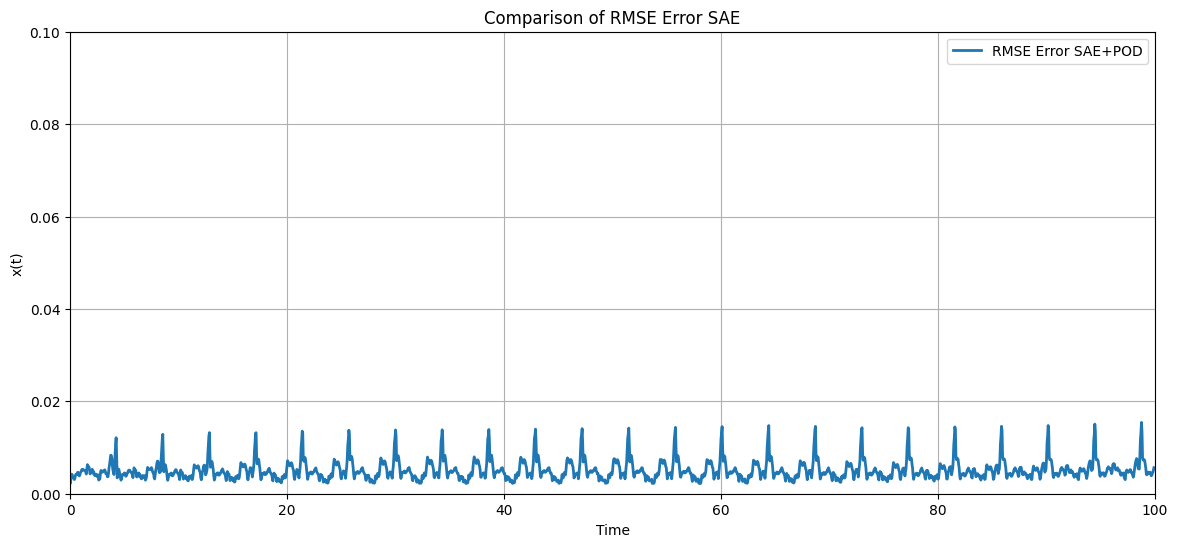

In [99]:
rmse_sae = np.zeros((len(Ux_true),))
rmse_sae_pod = np.zeros((len(Ux_true),))
for i in range(len(Ux_true)):
  rmse_sae[i] = np.sqrt(((Ux_true[i,:]-Ux_reconstructed[i,:]) ** 2).mean())

plt.figure(figsize=(14, 6))
plt.plot(t_train,rmse_sae, label='RMSE Error SAE+POD', linewidth=2)
plt.xlabel('Time')
plt.xlim(0,100)
plt.ylim(0,0.1)
plt.ylabel(f'x(t)')
plt.title(f'Comparison of RMSE Error SAE')
plt.legend()
plt.grid(True)
plt.savefig(fname='Comparison of RMSE Error SAE+POD.png', dpi=300, bbox_inches='tight')
plt.show()


In [100]:
print(Ux_reconstructed.shape)
Ux_reconstructed=Ux_reconstructed.reshape(1998,2,128,64)
Ux_true=Ux_true.reshape(1998,2,128,64)


(1998, 16384)


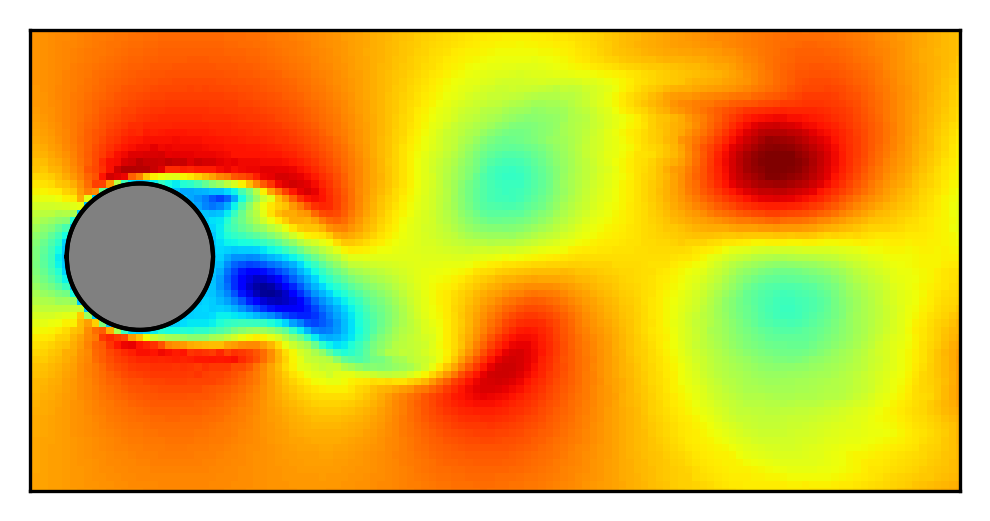

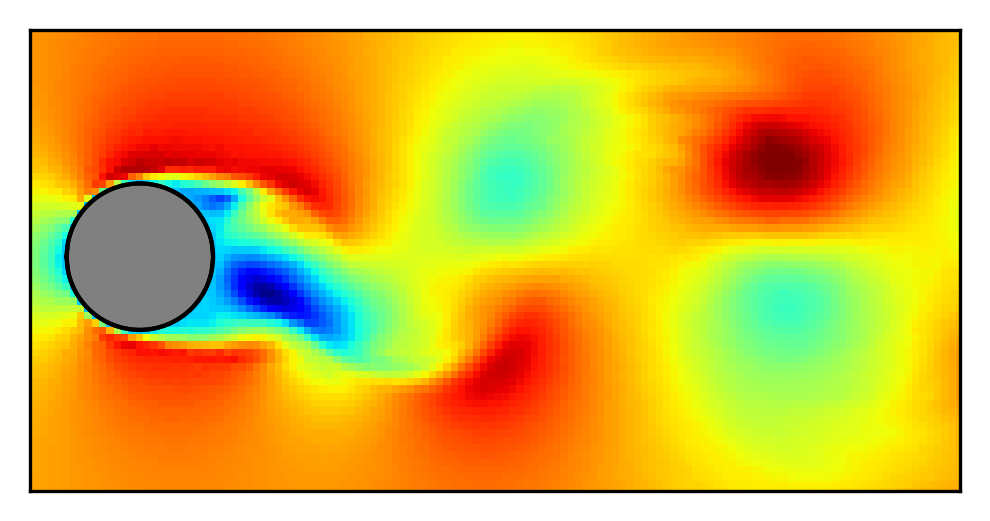

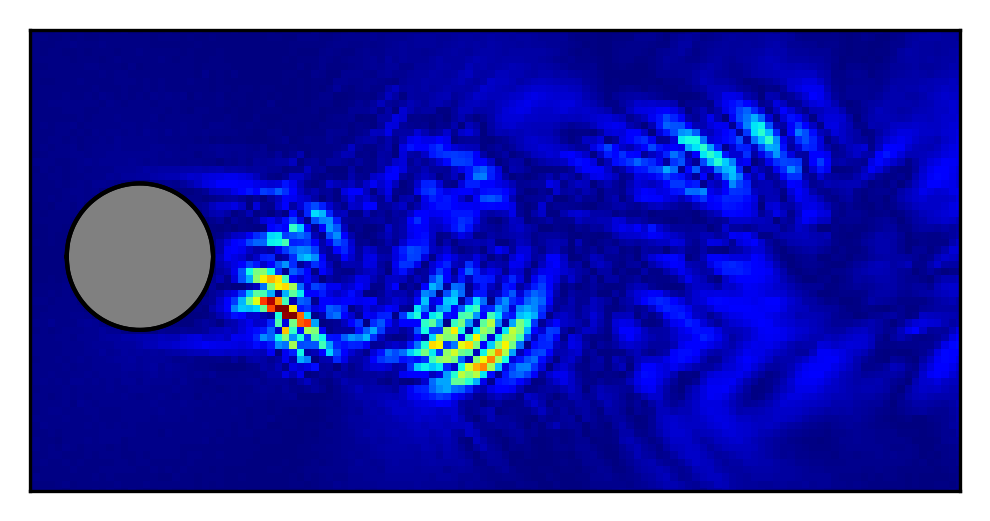

In [101]:
#Comparison of Contrours of Ux velocity at last timestep
t=1997 #98.5 s
contour(Ux_reconstructed[t,0,:,:],'jet',[-0.8,1.7],Xn,Yn)
contour(Ux_true[t,0,:,:],'jet',[-0.8,1.7],Xn,Yn)
contour(abs(Ux_true[t,0,:,:]-Ux_reconstructed[t,0,:,:]),'jet',[0,0.05],Xn,Yn)


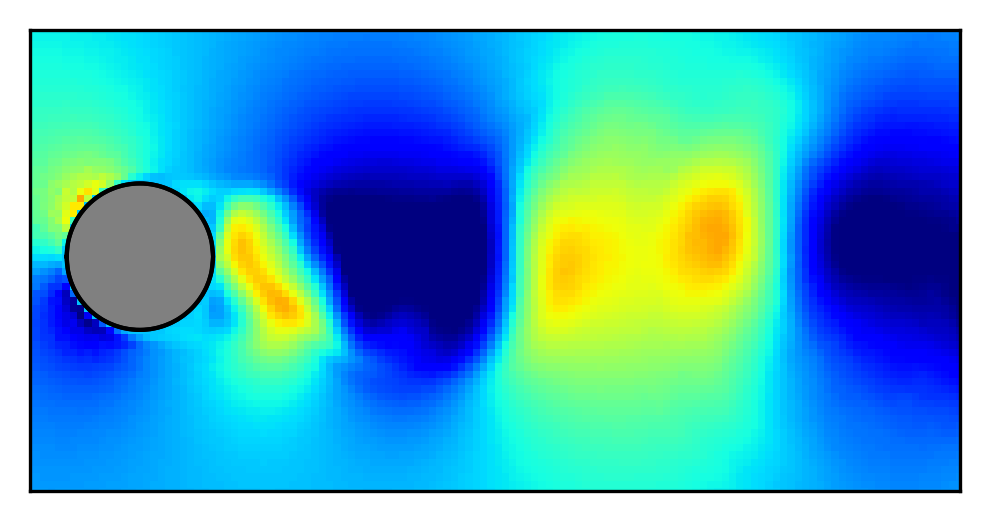

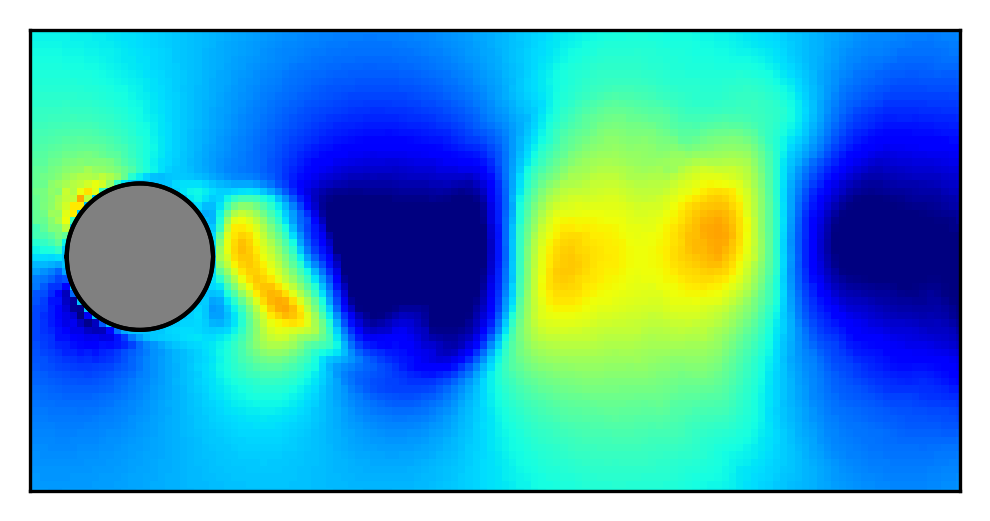

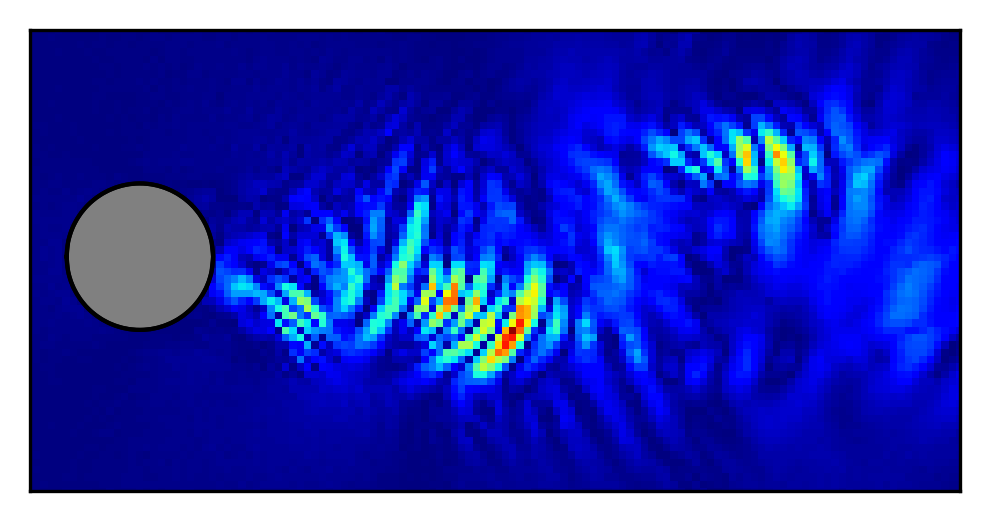

In [102]:
#Comparison of Contrours of Uy velocity at last timestep
t=1997 #98.5 s
contour(Ux_reconstructed[t,1,:,:],'jet',[-0.8,1.7],Xn,Yn)
contour(Ux_true[t,1,:,:],'jet',[-0.8,1.7],Xn,Yn)
contour(abs(Ux_true[t,1,:,:]-Ux_reconstructed[t,1,:,:]),'jet',[0,0.05],Xn,Yn)

## Example 6: Non-Linear 3D ODE


Our final example of this section shows the application of SINDy to identify of a non-linear system in three dimensions. The governing equations are given by the following system.

$$ \begin{aligned} \dot{x} &= \sigma({y}-{x}) \\ \dot{y} &= {x}(\rho-{z}) -{y} \\ \dot{z} &= {x}{y} - \beta{z} \end{aligned}$$

in which $\sigma=10$, $\rho=28$ and $\beta=8/3$.

##  Physical Interpretation

Variables:

  - 𝑥: Intensity of convective motion (how fast the fluid moves).

  - y: Horizontal temperature difference (temperature imbalance).

  - z: Vertical temperature profile (how temperature changes with height).

Parameters:

  - σ (Prandtl number): Ratio of momentum diffusivity to thermal diffusivity.

  - ρ (Rayleigh number): Drives the onset of convection; higher means more unstable system.

  - β: Geometric factor related to the fluid container.

## System Behavior

- For certain values, the system:

  - Never settles to a fixed point or a periodic orbit.

  - Instead, it evolves into a chaotic attractor (the Lorenz attractor) — a fractal structure in state space.
  
- Small changes in initial conditions lead to exponentially diverging outcomes → this is the essence of the "butterfly effect".

- Originally, it was meant to model thermal convection in the atmosphere.

- More generally, it's a canonical example of deterministic chaos.

- Used as a model for:

  - Atmospheric dynamics

  - Electrical circuits

  - Laser physics

  - Chemical reactions

- Population models

In [103]:
# Lorenz model
def lorenz(t, x, sigma=10, beta=2.66667, rho=28):
    return [
        sigma * (x[1] - x[0]),
        x[0] * (rho - x[2]) - x[1],
        x[0] * x[1] - beta * x[2],
    ]

In [104]:
# Generate training data
dt = 0.001
t_train = np.arange(0, 1, dt)
t_train_span = (t_train[0], t_train[-1])
x0_train = [-8, 8, 27]
x_train = solve_ivp(lorenz, t_train_span, 
                    x0_train, t_eval=t_train).y.T
x_dot_train_measured = np.array(
    [lorenz(0, x_train[i]) for i in range(t_train.size)]
)
scaler=MinMaxScaler(feature_range=(-1,1))
x_train=scaler.fit_transform(x_train)

Text(0.5, 1.0, 'True States')

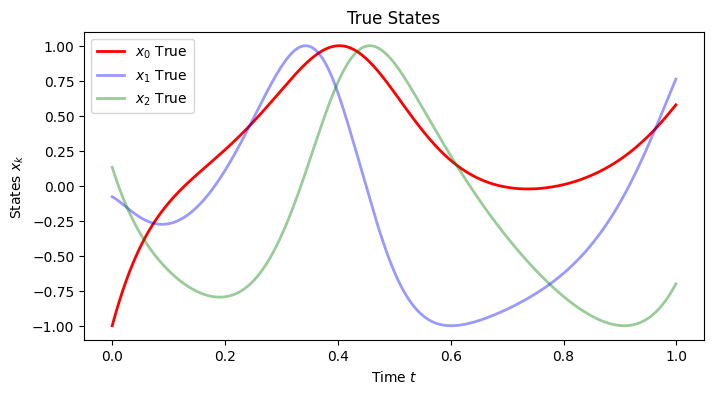

In [105]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))  # 1 row, 2 columns
ax.plot(t_train, x_train[:, 0], "r", label=r"$x_0$ True ", linewidth=2)
ax.plot(t_train, x_train[:, 1], "b", label=r"$x_1$ True ", alpha=0.4, linewidth=2)
ax.plot(t_train, x_train[:, 2], "g", label=r"$x_2$ True ", alpha=0.4, linewidth=2)
ax.set_xlabel("Time $t$")
ax.set_ylabel(r"States $x_k$")
ax.legend()
ax.set_title("True States")

In [106]:
# Fit the model
degree=5
matrix_theta=Theta(x_train,t_train,degree,True,False,False,False, outputLog=True)

# Calculate time derivatives (dx/dt)
dxdt = np.array([np.gradient(x_train[:, i], dt) for i in range(x_train.shape[1])]).T  # shape: (samples, features)

# Fit Adaptive Lasso for each state variable (i.e., for each feature in x_train)
coefficients = np.zeros((matrix_theta.shape[1], x_train.shape[1]))
for i in range(x_train.shape[1]):
    print(f"\nFitting variable {i}:")
    coefficients[:, i] = alasso(matrix_theta, dxdt[:, i], alpha=0.001, lasso_tol=1e-8, alasso_tol=1e-10)


Building Θ matrix with 1000 samples and 216 columns.
Including polynomial terms in x...
  Polynomial term (1): Column 0
  Polynomial term (x3): Column 1
  Polynomial term (x3^2): Column 2
  Polynomial term (x3^3): Column 3
  Polynomial term (x3^4): Column 4
  Polynomial term (x3^5): Column 5
  Polynomial term (x2): Column 6
  Polynomial term (x2x3): Column 7
  Polynomial term (x2x3^2): Column 8
  Polynomial term (x2x3^3): Column 9
  Polynomial term (x2x3^4): Column 10
  Polynomial term (x2x3^5): Column 11
  Polynomial term (x2^2): Column 12
  Polynomial term (x2^2x3): Column 13
  Polynomial term (x2^2x3^2): Column 14
  Polynomial term (x2^2x3^3): Column 15
  Polynomial term (x2^2x3^4): Column 16
  Polynomial term (x2^2x3^5): Column 17
  Polynomial term (x2^3): Column 18
  Polynomial term (x2^3x3): Column 19
  Polynomial term (x2^3x3^2): Column 20
  Polynomial term (x2^3x3^3): Column 21
  Polynomial term (x2^3x3^4): Column 22
  Polynomial term (x2^3x3^5): Column 23
  Polynomial term (x

In [107]:
powers=monomial_exponents(x_train.shape[1],degree)
print(powers)

coefficients

[(0, 0, 0), (0, 0, 1), (0, 0, 2), (0, 0, 3), (0, 0, 4), (0, 0, 5), (0, 1, 0), (0, 1, 1), (0, 1, 2), (0, 1, 3), (0, 1, 4), (0, 1, 5), (0, 2, 0), (0, 2, 1), (0, 2, 2), (0, 2, 3), (0, 2, 4), (0, 2, 5), (0, 3, 0), (0, 3, 1), (0, 3, 2), (0, 3, 3), (0, 3, 4), (0, 3, 5), (0, 4, 0), (0, 4, 1), (0, 4, 2), (0, 4, 3), (0, 4, 4), (0, 4, 5), (0, 5, 0), (0, 5, 1), (0, 5, 2), (0, 5, 3), (0, 5, 4), (0, 5, 5), (1, 0, 0), (1, 0, 1), (1, 0, 2), (1, 0, 3), (1, 0, 4), (1, 0, 5), (1, 1, 0), (1, 1, 1), (1, 1, 2), (1, 1, 3), (1, 1, 4), (1, 1, 5), (1, 2, 0), (1, 2, 1), (1, 2, 2), (1, 2, 3), (1, 2, 4), (1, 2, 5), (1, 3, 0), (1, 3, 1), (1, 3, 2), (1, 3, 3), (1, 3, 4), (1, 3, 5), (1, 4, 0), (1, 4, 1), (1, 4, 2), (1, 4, 3), (1, 4, 4), (1, 4, 5), (1, 5, 0), (1, 5, 1), (1, 5, 2), (1, 5, 3), (1, 5, 4), (1, 5, 5), (2, 0, 0), (2, 0, 1), (2, 0, 2), (2, 0, 3), (2, 0, 4), (2, 0, 5), (2, 1, 0), (2, 1, 1), (2, 1, 2), (2, 1, 3), (2, 1, 4), (2, 1, 5), (2, 2, 0), (2, 2, 1), (2, 2, 2), (2, 2, 3), (2, 2, 4), (2, 2, 5), (2, 3, 0)

array([[  5.46892574,  -0.        ,  -4.25439863],
       [ -0.        ,  -3.53105414,  -2.66303529],
       [ -0.        ,   0.        ,   0.        ],
       [ -0.        ,  -0.        ,   0.        ],
       [ -0.        ,   0.        ,   0.        ],
       [ -0.        ,  -0.        ,   0.        ],
       [  7.08742071,  -0.77216774,   1.97334916],
       [  0.        ,   0.        ,   0.        ],
       [  0.        ,  -0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ],
       [  0.        ,  -0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ],
       [  0.        ,  -0.        ,  -0.        ],
       [  0.        ,  -0.        ,  -0.        ],
       [  0.        ,   0.        ,  -0.        ],
       [  0.        ,  -0.        ,  -0.        ],
       [  0.        ,   0.        ,  -0.        ],
       [  0.        ,  -0.        ,  -0.        ],
       [ -0.        ,   0.        ,  -0.        ],
       [  0.        ,   0.     

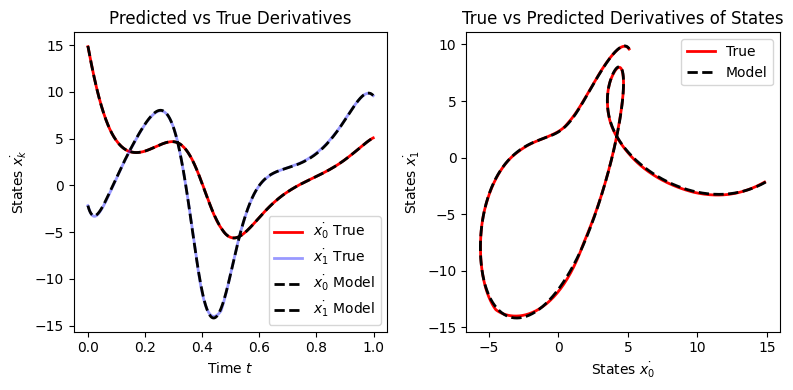

In [108]:
# Actual solution from the original system (x_train)
# Compute Theta_x for all time steps at once (this is the monomial terms for each state)
Theta_x_all = np.array([np.prod(np.power(x_train, power), axis=1) for power in powers]).T  # Shape: (num_samples, num_monomial_terms)

# Predicted derivatives using ve|ctorized matrix multiplication (Theta_x * zeta)
x_sim = np.dot(Theta_x_all, coefficients)  # Shape: (num_samples, num_state_variables)

# Create a figure with 1 row and 2 columns (for side-by-side plots)
fig, ax = plt.subplots(1, 2, figsize=(8, 4))  # 1 row, 2 columns

# First plot: Predicted vs True Derivatives
ax[0].plot(t_train, dxdt[:, 0], "r", label=r"$\dot{x_0}$ True ", linewidth=2)
ax[0].plot(t_train, dxdt[:, 1], "b", label=r"$\dot{x_1}$ True ", alpha=0.4, linewidth=2)
ax[0].plot(t_train, x_sim[:, 0], "k--", label=r"$\dot{x_0}$ Model", linewidth=2)
ax[0].plot(t_train, x_sim[:, 1], "k--", label=r"$\dot{x_1}$ Model", linewidth=2)
ax[0].set_xlabel("Time $t$")
ax[0].set_ylabel(r"States $\dot{x_k}$")
ax[0].legend()
ax[0].set_title("Predicted vs True Derivatives")

# Second plot: True vs Predicted States
ax[1].plot(dxdt[:, 0], dxdt[:, 1], "r", label="True", linewidth=2)
ax[1].plot(x_sim[:, 0], x_sim[:, 1], "k--", label="Model", linewidth=2)
ax[1].set_xlabel(r"States $\dot{x_0}$")
ax[1].set_ylabel(r"States $\dot{x_1}$")
ax[1].legend()
ax[1].set_title("True vs Predicted Derivatives of States")
# Adjust layout for better spacing
plt.tight_layout()
# Show the plots
plt.show()

In [109]:
# Time step size (assumes uniform time grid)
dt = t_train[1] - t_train[0]

# Initial state of the system (first sample from training data)
x0_train = x_train[0]

# Initialize the list to hold the reconstructed trajectory using RK4
x_manual = [x0_train]

# Define the learned dynamics as a function using the SINDy model
def f(x):
    # Evaluate the Theta library at the current state `x`
    # Theta uses only state variables (no time, no trig terms, no time polynomial)
    theta_x = Theta(x.reshape(1, -1),              # reshape to 2D (1, n_features)
                    np.array([0.0]),               # dummy time input (not used)
                    degree,                        # max polynomial degree
                    True, False, False, False,     # only use polynomial in x
                    outputLog=False)               # suppress logging
    # Compute the time derivative using the learned sparse coefficients
    return (theta_x @ coefficients).flatten()      # result is (n_features,) vector

# Perform RK4 integration over the time grid to reconstruct the system trajectory
for t in t_train[:-1]:                             # loop over all time steps except last
    x_current = x_manual[-1]                       # current state from previous RK4 step

    # Runge-Kutta 4th order steps
    k1 = f(x_current)                              # slope at beginning
    k2 = f(x_current + 0.5 * dt * k1)              # slope at midpoint (Euler step)
    k3 = f(x_current + 0.5 * dt * k2)              # improved midpoint slope
    k4 = f(x_current + dt * k3)                    # slope at next full time step

    # Combine RK4 increments to compute next state
    x_next = x_current + (dt / 6) * (k1 + 2*k2 + 2*k3 + k4)

    # Append next state to trajectory
    x_manual.append(x_next)

# Convert list of states to NumPy array for analysis or plotting
x_latent_sindy = np.array(x_manual)

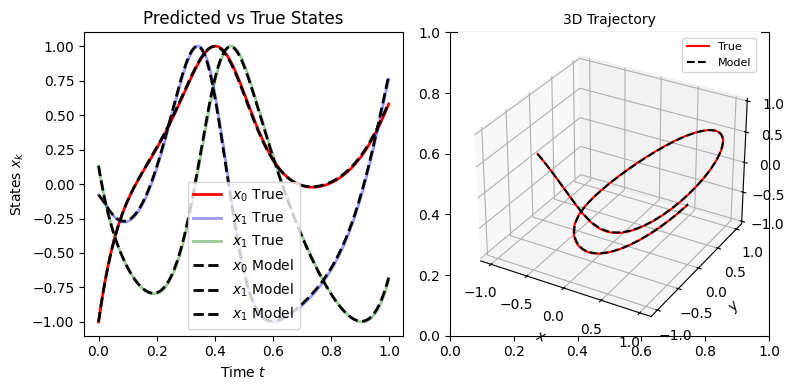

In [110]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))  # 1 row, 2 columns

# First plot: Predicted vs True Derivatives
ax[0].plot(t_train, x_train[:, 0], "r", label=r"${x_0}$ True ", linewidth=2)
ax[0].plot(t_train, x_train[:, 1], "b", label=r"${x_1}$ True ", alpha=0.4, linewidth=2)
ax[0].plot(t_train, x_train[:, 2], "g", label=r"${x_1}$ True ", alpha=0.4, linewidth=2)
ax[0].plot(t_train, x_latent_sindy[:, 0], "k--", label=r"${x_0}$ Model", linewidth=2)
ax[0].plot(t_train, x_latent_sindy[:, 1], "k--", label=r"${x_1}$ Model", linewidth=2)
ax[0].plot(t_train, x_latent_sindy[:, 2], "k--", label=r"${x_1}$ Model", linewidth=2)
ax[0].set_xlabel("Time $t$")
ax[0].set_ylabel(r"States ${x_k}$")
ax[0].legend()
ax[0].set_title("Predicted vs True States")


ax[1] = fig.add_subplot(gs[1], projection="3d")
ax[1].plot(x_train[:, 0], x_train[:, 1], x_train[:, 2], "r", label="True", linewidth=1.5)
ax[1].plot(x_latent_sindy[:, 0], x_latent_sindy[:, 1], x_latent_sindy[:, 2], "k--", label="Model", linewidth=1.5)
ax[1].set_xlabel(r"${x}$")
ax[1].set_ylabel(r"${y}$")
ax[1].set_zlabel(r"${z}$")
ax[1].set_title("3D Trajectory", fontsize=10)
ax[1].legend(fontsize=8)
plt.tight_layout()
plt.show()

In [111]:
# Compute the model error
error_x0 = np.linalg.norm(x_sim[:, 0] - dxdt[:, 0])/np.linalg.norm(x_sim[:, 0])
error_x1 = np.linalg.norm(x_sim[:, 1] - dxdt[:, 1])/np.linalg.norm(x_sim[:, 1])
error_x2 = np.linalg.norm(x_sim[:, 2] - dxdt[:, 2])/np.linalg.norm(x_sim[:, 2])
print(f"Error for x0: {error_x0*100} %")
print(f"Error for x1: {error_x1*100} %")
print(f"Error for x2: {error_x2*100} %")

Error for x0: 0.2672979921626401 %
Error for x1: 0.983065162376558 %
Error for x2: 0.3817489939421923 %


In [112]:
# Compute the trajectory error
error_x0 = np.linalg.norm(x_train[:, 0] - x_latent_sindy[:, 0])/np.linalg.norm(x_train[:, 0])
error_x1 = np.linalg.norm(x_train[:, 1] - x_latent_sindy[:, 1])/np.linalg.norm(x_train[:, 1])
error_x2 = np.linalg.norm(x_train[:, 2] - x_latent_sindy[:, 2])/np.linalg.norm(x_train[:, 2])
print(f"Error for x0: {error_x0*100} %")
print(f"Error for x1: {error_x1*100} %")
print(f"Error for x2: {error_x2*100} %")

Error for x0: 1.453087149445369 %
Error for x1: 2.474733266501958 %
Error for x2: 1.850366393217597 %
